# Semestrální práce 2

In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import concurrent.futures
import time
import pandas as pd
from MWSATInstance import MWSATInstance
from MWSATSolution import MWSATSolution
from simulated_annealing import simulated_annealing
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np

# 1) Ukázka implementace
Implementace programové reprezentace MWSAt instancí je v souboru MWSATInstance.py. Jsou uchovávány jednodlivé klauzule a proměnné jsou reprezenovány stejně jako ve vstupním souboru. Pro efektivní práci dále třída MWSATInstance uchovává pro každou proměnnou klauzule v kterých je obsažena.

Pojďme se jen rychle podívat na reprezentaci následujícího souboru:

> c This Formular is generated by mcnf \
> c \
> c    horn? no  \
> c    forced? no  \
> c    mixed sat? no  \
> c    clause length = 3  \
> c \
> c SAT instance uf20-91/uf20-01.cnf \
> p mwcnf 20 91 \
> w 272 39 39 194 1 194 1 78 117 156 39 1 233 311 311 1 311 39 39 311 0 \
> c range 100 1500 straight \
>  4 -18 19 0 \
> 3 18 -5 0 \
> -5 -8 -15 0 \
> -20 7 -16 0 \
> 10 -13 -7 0 \
> -12 -9 17 0 \
> 17 19 5 0 \
> -16 9 15 0 \
> 11 -5 -14 0 \
> 18 -10 13 0 \
> -3 11 12 0 \
> -6 -17 -8 0 \
> -18 14 1 0 \
> -19 -15 10 0 \
> 12 18 -19 0 \
> -8 4 7 0 \
> -8 -9 4 0 \
> 7 17 -15 0 \
> 12 -7 -14 0 \
> -10 -11 8 0 \
> 2 -15 -11 0 \
> 9 6 1 0 \
> -11 20 -17 0 \
> 9 -15 13 0 \
> 12 -7 -17 0 \
> -18 -2 20 0 \
> 20 12 4 0 \
> 19 11 14 0 \
> -16 18 -4 0 \
> -1 -17 -19 0 \
> -13 15 10 0 \
> -12 -14 -13 0 \
> 12 -14 -7 0 \
> -7 16 10 0 \
> 6 10 7 0 \
> 20 14 -16 0 \
> -19 17 11 0 \
> -7 1 -20 0 \
> -5 12 15 0 \
> -4 -9 -13 0 \
> 12 -11 -7 0 \
> -5 19 -8 0 \
> 1 16 17 0 \
> 20 -14 -15 0 \
> 13 -4 10 0 \
> 14 7 10 0 \
> -5 9 20 0 \
> 10 1 -19 0 \
> -16 -15 -1 0 \
> 16 3 -11 0 \
> -15 -10 4 0 \
> 4 -15 -3 0 \
> -10 -16 11 0 \
> -8 12 -5 0 \
> 14 -6 12 0 \
> 1 6 11 0 \
> -13 -5 -1 0 \
> -7 -2 12 0 \
> 1 -20 19 0 \
> -2 -13 -8 0 \
> 15 18 4 0 \
> -11 14 9 0 \
> -6 -15 -2 0 \
> 5 -12 -15 0 \
> -6 17 5 0 \
> -13 5 -19 0 \
> 20 -1 14 0 \
> 9 -17 15 0 \
> -5 19 -18 0 \
> -12 8 -10 0 \
> -18 14 -4 0 \
> 15 -9 13 0 \
> 9 -5 -1 0 \
> 10 -19 -14 0 \
> 20 9 4 0 \
> -9 -2 19 0 \
> -5 13 -17 0 \
> 2 -10 -18 0 \
> -18 3 11 0 \
> 7 -9 17 0 \
> -15 -6 -3 0 \
> -2 3 -13 0 \
> 12 3 -2 0 \
> -2 -3 17 0 \
> 20 -15 -16 0 \
> -5 -17 -19 0 \
> -20 -18 11 0 \
> -9 1 -5 0 \
> -19 9 17 0 \
> 12 -2 17 0 \
> 4 -16 -5 0 \
 \
 \
 \
 \
 \

In [26]:
# instance_demo = MWSATInstance(os.path.join("data","wuf20-91","wuf20-91-M","wuf20-01.mwcnf"))
instance_demo = MWSATInstance(os.path.join("test.mwcnf"))
print("Number of variables: ", instance_demo.num_vars)
print("First clause: ", instance_demo.clauses[0])
print("Clauses for variable 1: ", instance_demo.get_clauses_for_var(1))

print("Weight for variable 1: ", instance_demo.get_weight_for_variable(1))
print("Weight for variable 2: ", instance_demo.get_weight_for_variable(2))
print("Weight for variable 3: ", instance_demo.get_weight_for_variable(3))

print("Max-weight: ", instance_demo.max_single_weight)
print("Eval for [1,1,1]: ", instance_demo.evaluate([1,1,1]))
print("Eval for [1,0,1]: ", instance_demo.evaluate([1,0,1]))

print("Satisfied literals in clause 1, variables [1,1,1]: ", instance_demo.get_satisfied_vars_in_clause_count(instance_demo.clauses[0],[1,1,1]))

Number of variables:  3
First clause:  (1, -2, 3)
Clauses for variable 1:  [(1, -2, 3)]
Weight for variable 1:  272
Weight for variable 2:  39
Weight for variable 3:  39
Max-weight:  272
Eval for [1,1,1]:  (350, 1.2867647058823528, True)
Eval for [1,0,1]:  (311, 1.1433823529411764, True)
Satisfied literals in clause 1, variables [1,1,1]:  2


In [27]:
solution = MWSATSolution(instance_demo)

print("Clauses: ", solution.instance.clauses)
print("Solution var values: ", solution.variable_values)
print("Solution score: ", solution.current_score)
print("Solution clauses satisfied", solution.clauses_satisfied)
print("-------Solution flip 1----- ")
solution.update_variable_and_score(1)
print("Solution var values after: ", solution.variable_values)
print("Solution score after: ", solution.current_score)
print("Solution clauses satisfied after: ", solution.clauses_satisfied)

Clauses:  [(1, -2, 3)]
Solution var values:  [0, 1, 0]
Solution score:  39
Solution clauses satisfied 0
-------Solution flip 1----- 
Solution var values after:  [1, 1, 0]
Solution score after:  311
Solution clauses satisfied after:  1


In [28]:
instance1 = MWSATInstance(os.path.join("data","wuf50-218","wuf50-218-M","wuf50-02.mwcnf"),penalty_violation_factor=3)
# result_solution, history_clauses_sat, history_raw_score = simulated_annealing(instance1,1000,0.05,100,0.01)
result_solution, history = simulated_annealing(instance1,1000,0.95,100,max_steps_without_improvement=10000,fitness_coefficient=1)
print(result_solution.variable_values)
print(result_solution.clauses_satisfied)
print(result_solution.current_score)

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
218
24366


# 2) Whitebox fáze
- Cílem této fáze bude nastavit parametry na omezené sadě instancí
- My budeme používat sadu wuf50-218 a z ní první 4 instance 

In [29]:
from helper import evaluate_algorithm_performance,plot_algorithm_run,get_solution_dict

In [30]:
wuf_50_m_path = os.path.join("data","wuf50-218", "wuf50-218-M")
wuf_50_n_path = os.path.join("data","wuf50-218", "wuf50-218-N")
wuf_50_q_path = os.path.join("data","wuf50-218", "wuf50-218-Q")
wuf_50_r_path = os.path.join("data","wuf50-218", "wuf50-218-R")
wuf_50_path = os.path.join("data","wuf50-218")

wuf_20_r_path = os.path.join("data","wuf20-91", "wuf20-91-R")
wuf_20_n_path = os.path.join("data","wuf20-91", "wuf20-91-N")
wuf_20_q_path = os.path.join("data","wuf20-91", "wuf20-91-Q")
wuf_20_m_path = os.path.join("data","wuf20-91", "wuf20-91-M")
wuf_20_path = os.path.join("data","wuf20-91")

wuf_75_r_path = os.path.join("data","wuf75-325", "wuf75-325-R")
wuf_75_m_path = os.path.join("data","wuf75-325", "wuf75-325-M")
wuf_75_q_path = os.path.join("data","wuf75-325", "wuf75-325-Q")
wuf_75_n_path = os.path.join("data","wuf75-325", "wuf75-325-N")
wuf_75_path = os.path.join("data","wuf75-325")

instance_paths = [os.path.join(wuf_50_r_path,x) for x in os.listdir(wuf_50_r_path)[:10]]
solutions_wuf_50_r = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-R-opt.dat"))

Prvním krokem v White box fáze bude nastavení počáteční teploty. Využijeme vzorec z přdnášky 
$$
T_0 = \frac{\delta}{\ln P_0}
$$

kde $\delta$ je hlouba lokálního optima a $P$ je pravděpodobnost útěku z tohoto optima na počátku. Parametr delta lze spočítat jako průměrnou hloubku lokálních optim a parametr P budeme volit jako hyperparametr.

Pro získání $\delta$ mám upravenou verzi algoritmu simulated_annealing, která ukládá hodnoty při zhoršení. Necháme algoritmus běžet s nekonečnou teplotou, tak aby byla explorace prostoru maximální a zjistili jsme průměrnou hloubku lokálních optim. 

Pro klaždý druh generování vah budou optima mít různé hodnoty takže je budeme muset měřit zvlášť. 

# 2.1) Baseline konfigurace
- Je potřeba vytvořit si nějakou kombinaci parametrů, který funguje "dobře" na zkoumaných instancích
- Od této konfigurace se potom odpíchneme a budeme ladit jednotlivé parametry samostatně

--- Starting Baseline configuration on 50 variable instances (100 total runs) ---
Params: {'P0': 0.9, 'cooling_coefficient': 0.9, 'equilibrium_steps': 3, 'max_steps_without_improvement': 300, 'fitness_coefficient': 100, 'random_flip': True}
Processing Instance 1/10: wuf50-0323.mwcnf
Processing Instance 2/10: wuf50-0366.mwcnf
Processing Instance 3/10: wuf50-069.mwcnf
Processing Instance 4/10: wuf50-094.mwcnf
Processing Instance 5/10: wuf50-0861.mwcnf
Processing Instance 6/10: wuf50-0824.mwcnf
Processing Instance 7/10: wuf50-0657.mwcnf
Processing Instance 8/10: wuf50-0286.mwcnf
Processing Instance 9/10: wuf50-0612.mwcnf
Processing Instance 10/10: wuf50-0939.mwcnf


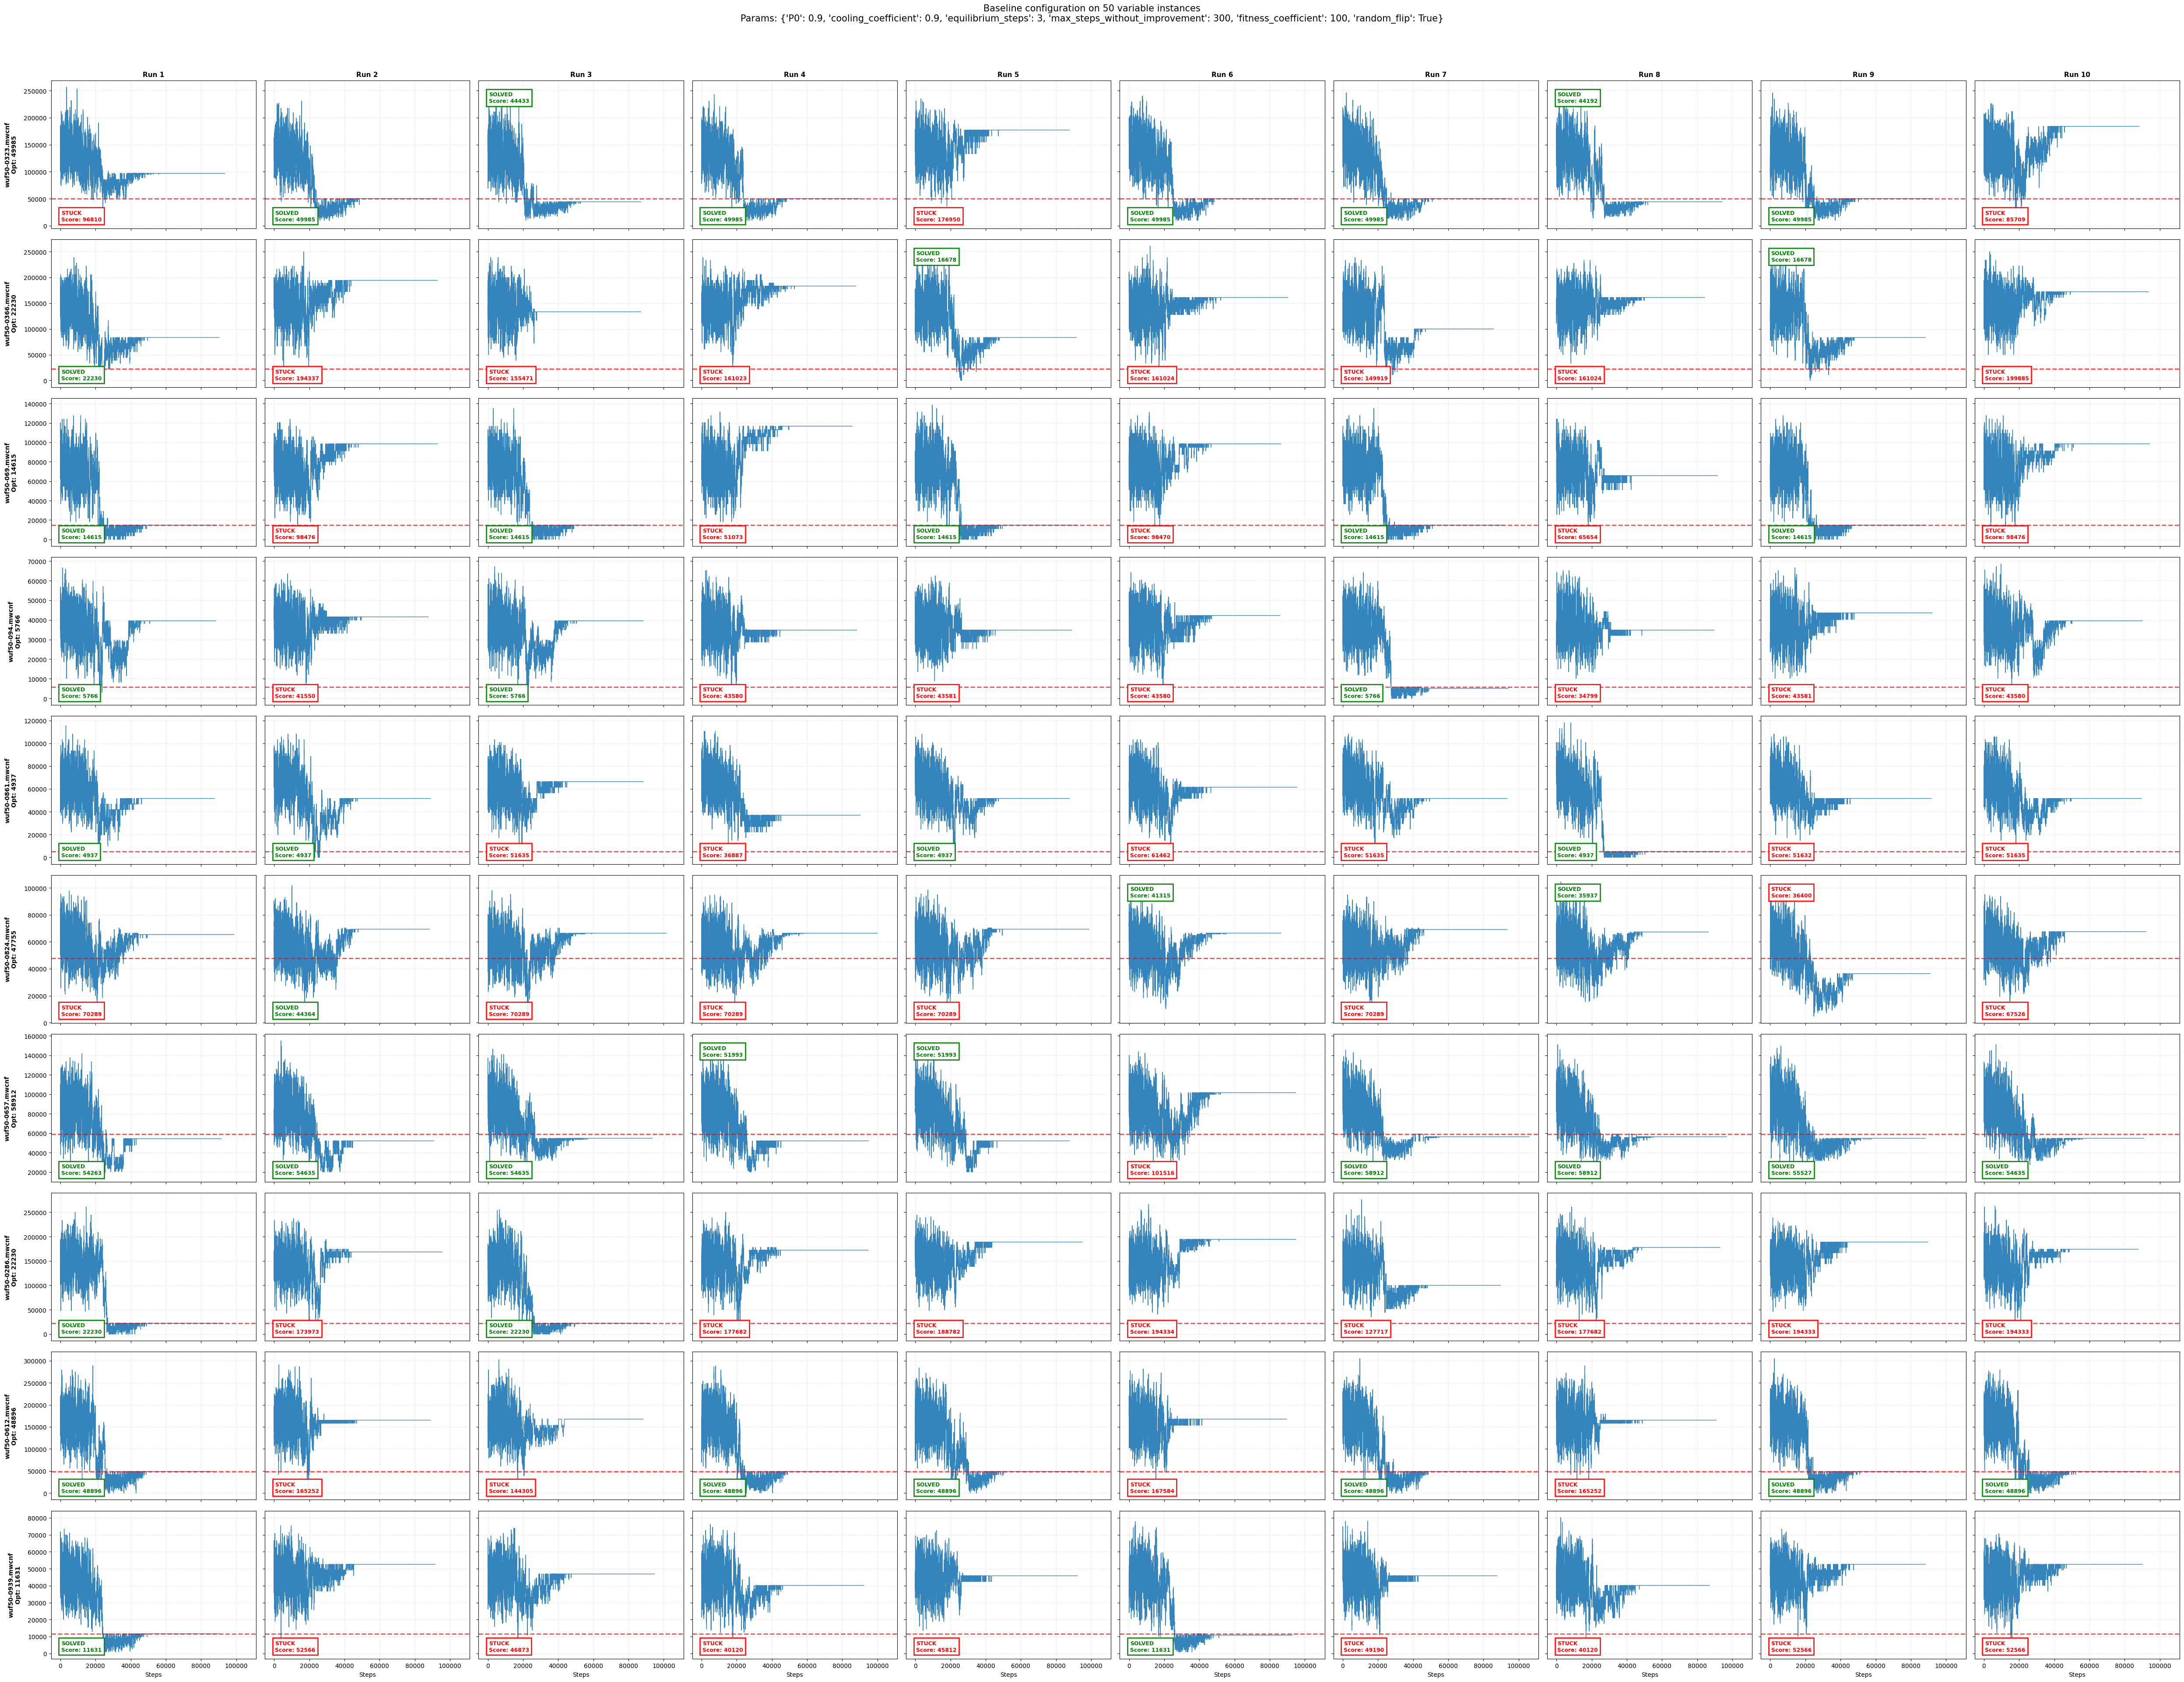


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-0323.mwcnf          | 10   | 7      | 5       | 48364.3    | 96.76 %  | 91560.0  
wuf50-0366.mwcnf          | 10   | 3      | 1       | 18528.7    | 83.35 %  | 89140.2  
wuf50-069.mwcnf           | 10   | 5      | 5       | 14615.0    | 100.00%  | 89859.6  
wuf50-094.mwcnf           | 10   | 3      | 3       | 5766.0     | 100.00%  | 89336.4  
wuf50-0861.mwcnf          | 10   | 4      | 4       | 4937.0     | 100.00%  | 90579.0  
wuf50-0824.mwcnf          | 10   | 3      | 0       | 40538.7    | 84.89 %  | 93652.8  
wuf50-0657.mwcnf          | 10   | 9      | 2       | 55056.1    | 93.45 %  | 93522.0  
wuf50-0286.mwcnf          | 10   | 2      | 2       | 22230.0    | 100.00%  | 92344.8  
wuf50-0612.mwcnf          | 10   | 6      | 6       | 48896.0    | 100.00%  | 90317.4  
wuf50-0939.mwcnf       

In [7]:
baseline_P0 = 0.9
baseline_cooling_coeff = 0.9
baseline_equilibrium_steps = 3 # Using the new coefficient (6 * 50 = 300)
baseline_max_steps_without_improvement = 300
baseline_fitness_coefficient = 100

PARAMS = {
    "P0": baseline_P0,
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": baseline_fitness_coefficient,
    "random_flip": True
}
results = evaluate_algorithm_performance(instance_paths[:10],solutions_wuf_50_r,PARAMS,10,"Baseline configuration on 50 variable instances")

<Axes: title={'center': 'wuf50-0366.mwcnf'}, xlabel='Steps', ylabel='Score'>

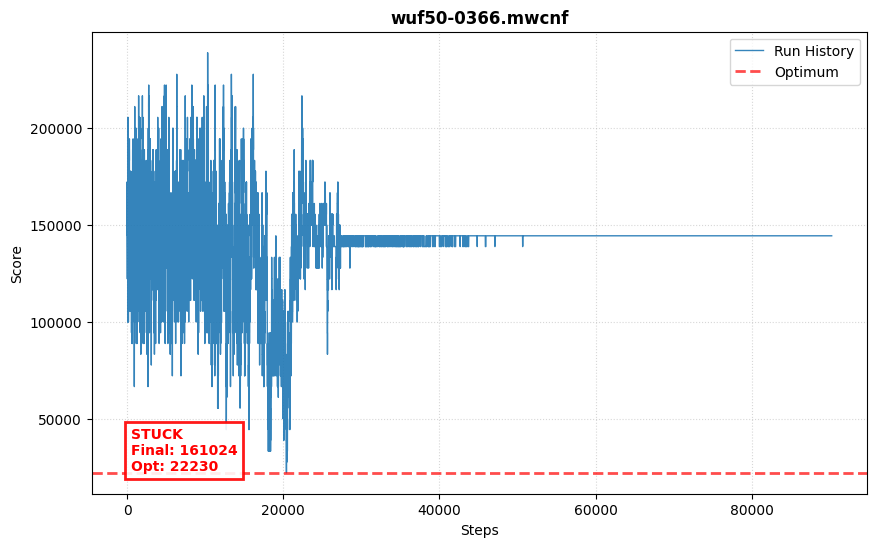

In [8]:
instance = MWSATInstance(instance_paths[1])
plot_algorithm_run(instance,solutions_wuf_50_r,PARAMS)

# Zlepší jinej random flip výkon baseline konfigurace

--- Starting Baseline configuration on 50 variable instances (100 total runs) ---
Params: {'P0': 0.9, 'cooling_coefficient': 0.9, 'equilibrium_steps': 3, 'max_steps_without_improvement': 100, 'fitness_coefficient': 100, 'random_flip': False}
Processing Instance 1/10: wuf50-0323.mwcnf
Processing Instance 2/10: wuf50-0366.mwcnf
Processing Instance 3/10: wuf50-069.mwcnf
Processing Instance 4/10: wuf50-094.mwcnf
Processing Instance 5/10: wuf50-0861.mwcnf
Processing Instance 6/10: wuf50-0824.mwcnf
Processing Instance 7/10: wuf50-0657.mwcnf
Processing Instance 8/10: wuf50-0286.mwcnf
Processing Instance 9/10: wuf50-0612.mwcnf
Processing Instance 10/10: wuf50-0939.mwcnf


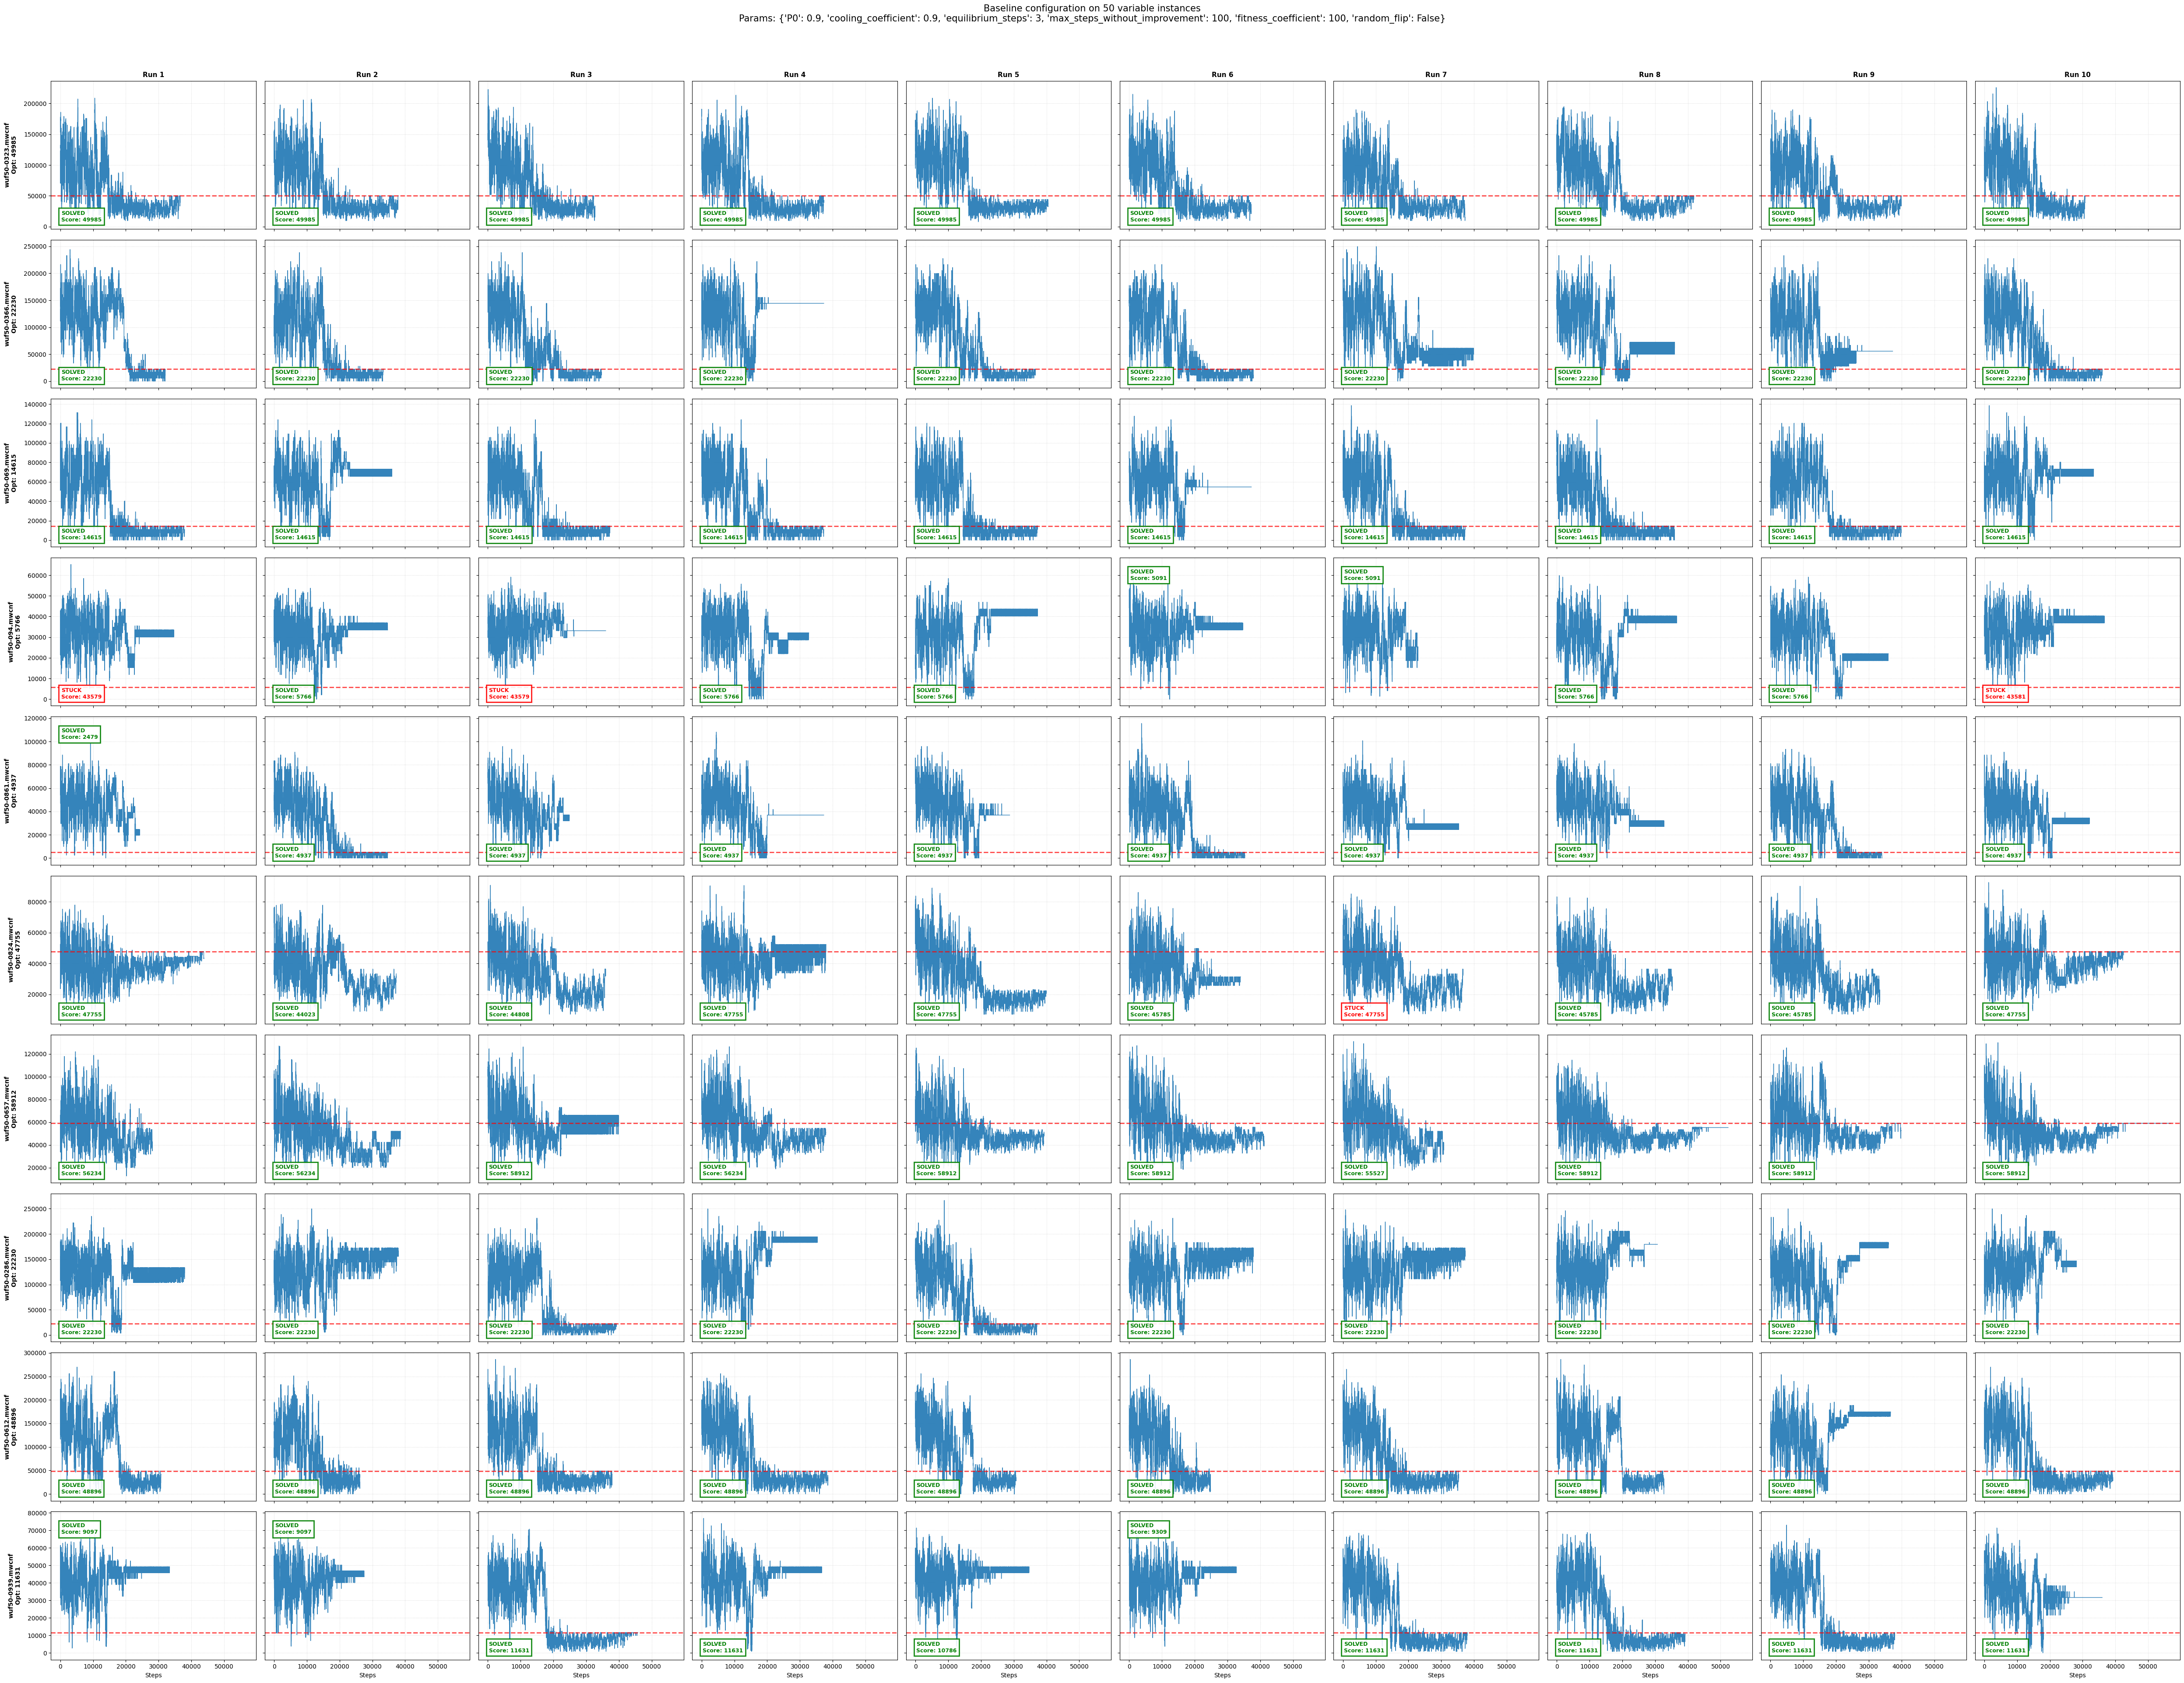


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-0323.mwcnf          | 10   | 10     | 10      | 49985.0    | 100.00%  | 37212.6  
wuf50-0366.mwcnf          | 10   | 10     | 10      | 22230.0    | 100.00%  | 36100.8  
wuf50-069.mwcnf           | 10   | 10     | 10      | 14615.0    | 100.00%  | 36951.0  
wuf50-094.mwcnf           | 10   | 7      | 5       | 5573.1     | 96.66 %  | 34204.2  
wuf50-0861.mwcnf          | 10   | 10     | 9       | 4691.2     | 95.02 %  | 31915.2  
wuf50-0824.mwcnf          | 10   | 9      | 4       | 46356.2    | 97.07 %  | 37670.4  
wuf50-0657.mwcnf          | 10   | 10     | 6       | 57770.1    | 98.06 %  | 40482.6  
wuf50-0286.mwcnf          | 10   | 10     | 10      | 22230.0    | 100.00%  | 35773.8  
wuf50-0612.mwcnf          | 10   | 10     | 10      | 48896.0    | 100.00%  | 33288.6  
wuf50-0939.mwcnf       

In [32]:
PARAMS = {
    "P0": baseline_P0,
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": baseline_fitness_coefficient,
    "random_flip": False
}
results = evaluate_algorithm_performance(instance_paths[:10],solutions_wuf_50_r,PARAMS,10,"Baseline configuration on 50 variable instances")

# 2.2 Nastavení Fitness coefficient
Nastavit funkci která ovlivňuje míru mutace bude nejlepší nastavit jako první

In [31]:
from helper import run_tuning_experiment

--- Tuning 'fitness_coefficient' on wuf50-0323.mwcnf (9 total runs) ---
Testing fitness_coefficient = 10...
Testing fitness_coefficient = 50...
Testing fitness_coefficient = 100...


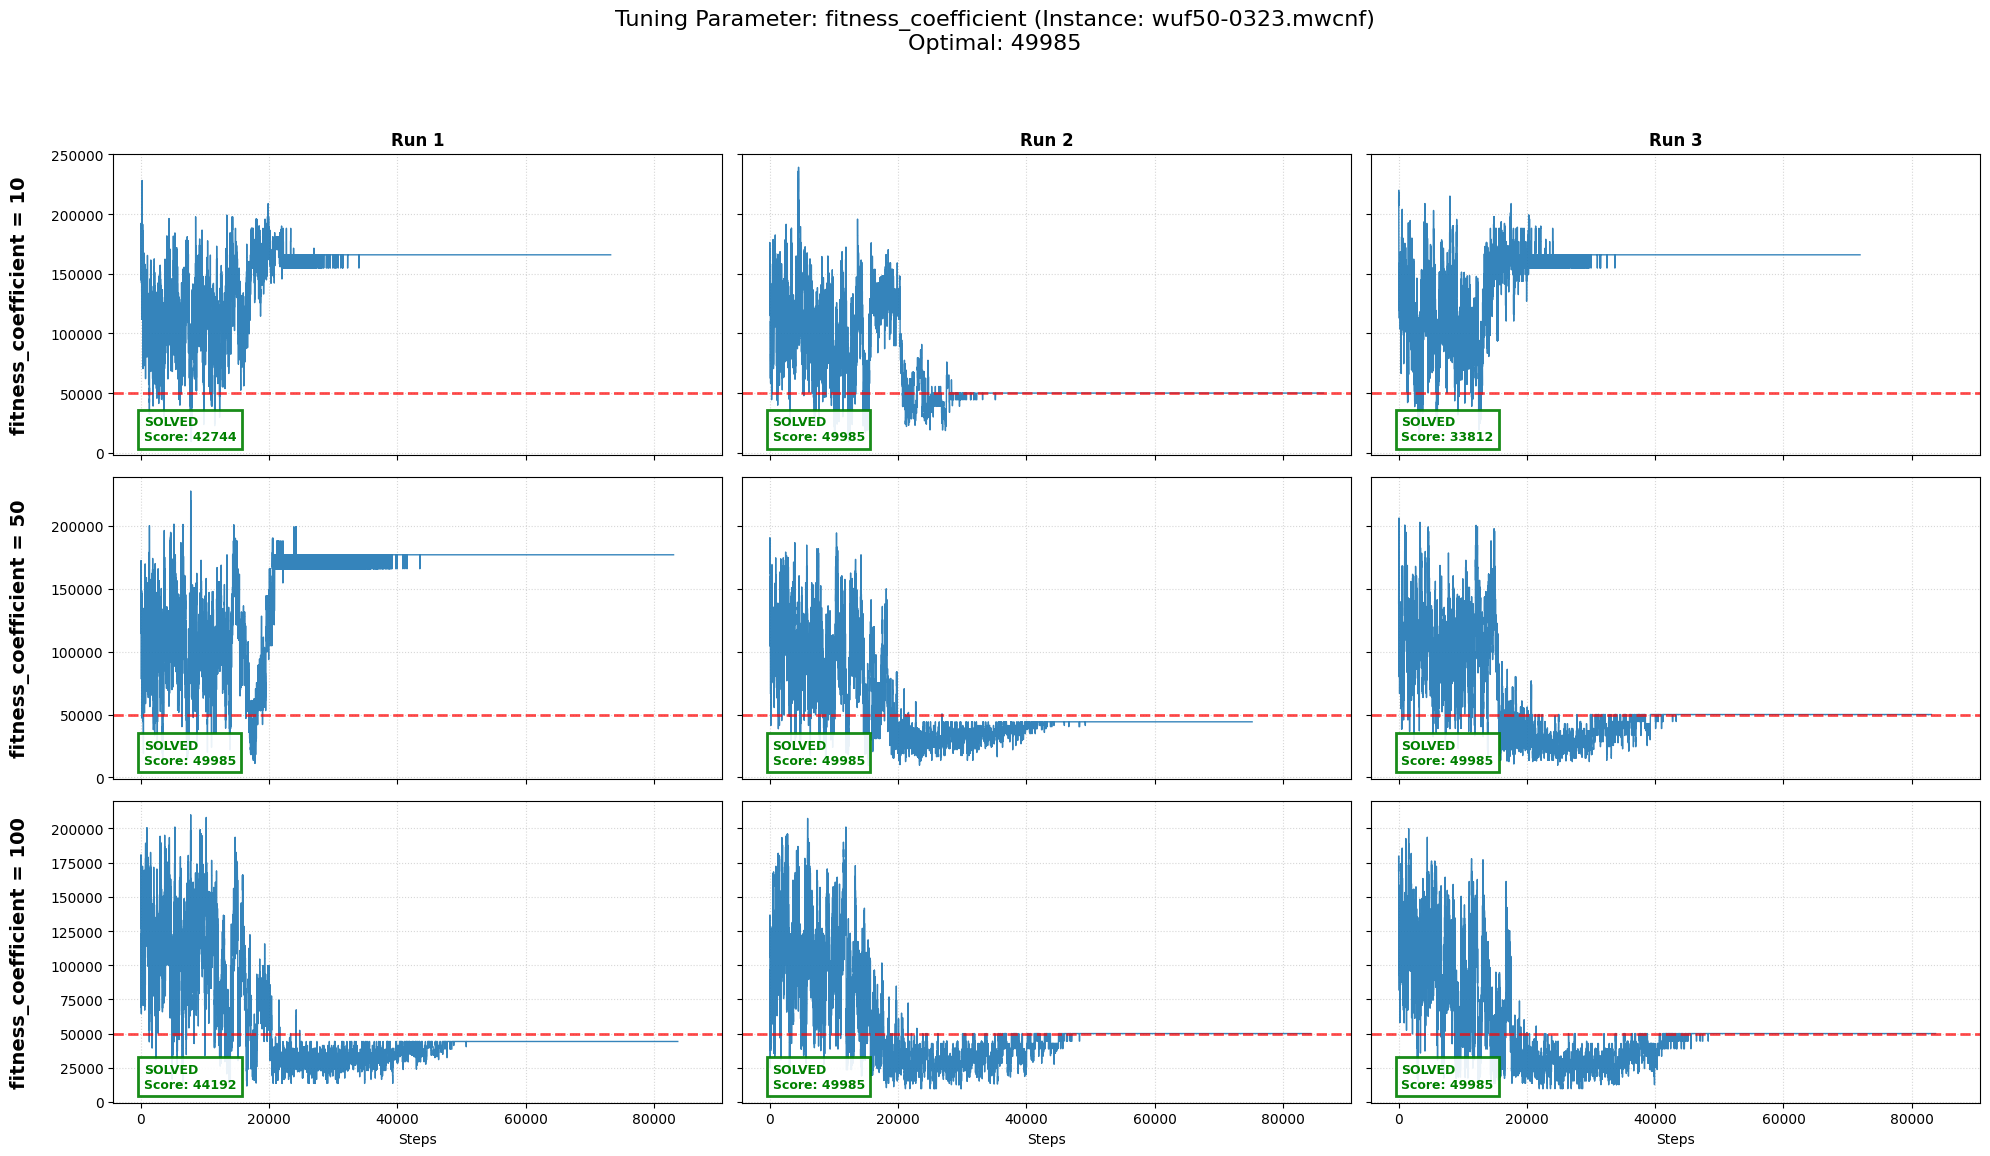


fitness_coefficient | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
10              | 3    | 3      | 1       | 42180.3    | 84.39 %  | 77172.0  
50              | 3    | 3      | 3       | 49985.0    | 100.00%  | 80442.0  
100             | 3    | 3      | 2       | 48054.0    | 96.14 %  | 83930.0  


In [24]:
base_params = {
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "P0": baseline_P0
}

target_path = instance_paths[0]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="fitness_coefficient",
    param_values=[10,50,100],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=3
)

In [38]:
best_fitness_coeff_param = 100

# 2.3) Nastavení `P0`
- Jak dlouho budeme explorovat na začátku

--- Tuning 'P0' on wuf50-069.mwcnf (25 total runs) ---
Testing P0 = 0.6...
Testing P0 = 0.7...
Testing P0 = 0.8...
Testing P0 = 0.85...
Testing P0 = 0.9...


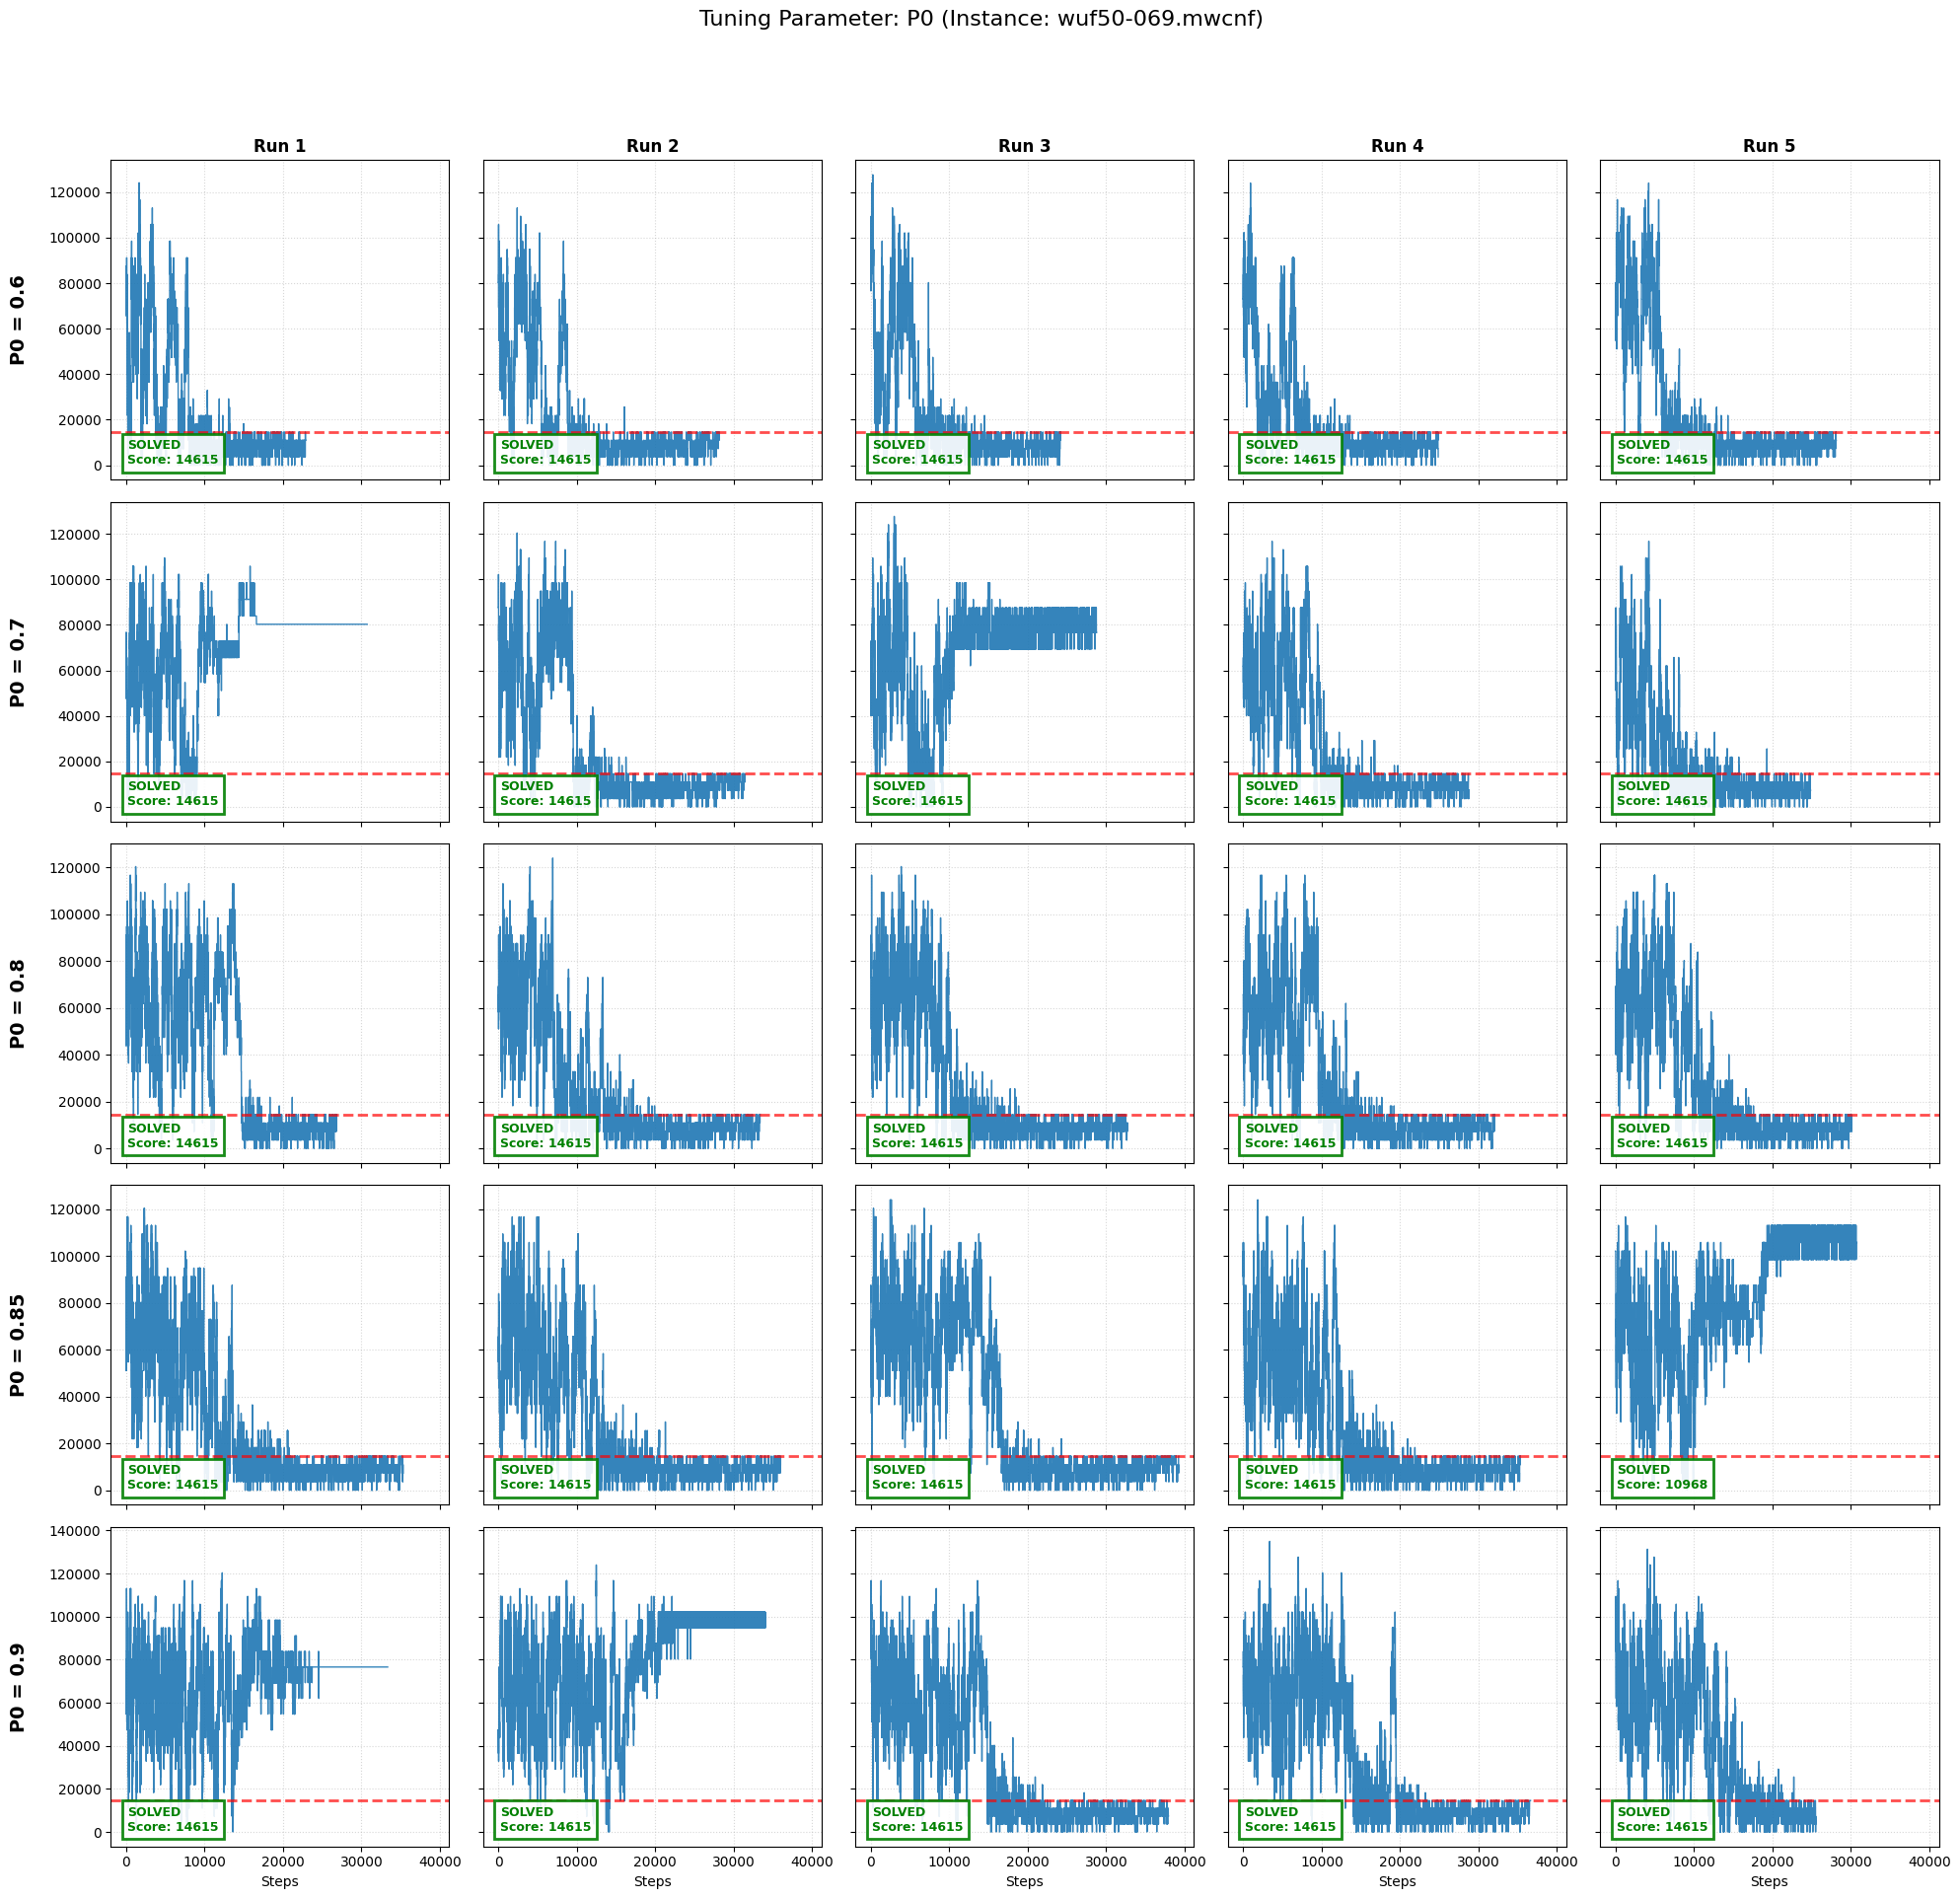


P0              | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
0.6             | 5    | 5      | 5       | 14615.0    | 100.00%  | 25636.8  
0.7             | 5    | 5      | 5       | 14615.0    | 100.00%  | 28906.8  
0.8             | 5    | 5      | 5       | 14615.0    | 100.00%  | 30999.6  
0.85            | 5    | 5      | 4       | 13885.6    | 95.01 %  | 35316.0  
0.9             | 5    | 5      | 5       | 14615.0    | 100.00%  | 33484.8  


In [14]:
base_params = {
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": best_fitness_coeff_param,
    "cooling_coefficient": baseline_cooling_coeff
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="P0",
    param_values=[0.6,0.7,0.8,0.85,0.9],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [37]:
best_p0_param = 0.8

In [17]:

# --- Configuration for Grid Search ---
# Pick a harder instance (e.g., from the 'R' set) to see the difference clearly
# Assuming instance_paths_50 and solutions_wuf_50_r are defined from your previous cells
target_instance_path = instance_paths[0] 
target_solutions_dict = solutions_wuf_50_r

# Define the grid of parameters to test
cooling_values = [0.95, 0.99,0.995, 0.999,0.9995]
steps_values = [1, 3,4, 6, 8]
n_runs = 3 # Keep low (3-5) for speed

# Get optimum info
filename = os.path.basename(target_instance_path)
key = filename.split(".")[0]
opt_weight = target_solutions_dict.get(key, 0)

print(f"--- Grid Search on {filename} ---")
print(f"Target Optimum: {opt_weight}")
print(f"Testing cooling_coefficient vs equilibrium_steps")
print("-" * 75)

# --- Main Loops ---
for alpha in cooling_values:
    for steps in steps_values:
        
        # 1. Update Parameters manually
        current_params = PARAMS.copy()
        current_params["cooling_coefficient"] = alpha
        current_params["equilibrium_steps"] = steps
        
        success_count = 0
        scores = []
        
        # 2. Run Repetitions
        for _ in range(n_runs):
            instance = MWSATInstance(target_instance_path)
            best_state, _ = simulated_annealing(instance, **current_params)
            
            # Check for strict success (Valid AND Optimal)
            is_valid = best_state.clauses_satisfied == instance.num_clauses
            is_optimal = is_valid
            
            if is_optimal:
                success_count += 1
            
            if is_valid:
                scores.append(best_state.current_score)
            else:
                scores.append(0) # Penalize invalid runs in the average score
        
        # 3. Calculate Metrics
        success_rate = (success_count / n_runs) * 100
        avg_score = np.mean(scores)
        
        # 4. Print Result Immediately
        print(f"Cooling: {alpha:<4} | Steps: {steps:<3} -> Success: {success_rate:>5.1f}% | Avg Score: {int(avg_score)}")

--- Grid Search on wuf50-0323.mwcnf ---
Target Optimum: 49985
Testing cooling_coefficient vs equilibrium_steps
---------------------------------------------------------------------------
Cooling: 0.95 | Steps: 1   -> Success: 100.0% | Avg Score: 48134
Cooling: 0.95 | Steps: 3   -> Success: 100.0% | Avg Score: 48134
Cooling: 0.95 | Steps: 4   -> Success: 100.0% | Avg Score: 49985
Cooling: 0.95 | Steps: 6   -> Success: 100.0% | Avg Score: 46444
Cooling: 0.95 | Steps: 8   -> Success: 100.0% | Avg Score: 49985
Cooling: 0.99 | Steps: 1   -> Success: 100.0% | Avg Score: 46283
Cooling: 0.99 | Steps: 3   -> Success: 100.0% | Avg Score: 41295
Cooling: 0.99 | Steps: 4   -> Success: 100.0% | Avg Score: 37272
Cooling: 0.99 | Steps: 6   -> Success: 100.0% | Avg Score: 44513
Cooling: 0.99 | Steps: 8   -> Success: 100.0% | Avg Score: 44433
Cooling: 0.995 | Steps: 1   -> Success: 100.0% | Avg Score: 48134
Cooling: 0.995 | Steps: 3   -> Success: 100.0% | Avg Score: 36145
Cooling: 0.995 | Steps: 4   -> 

# 2.4) Nastavení `cooling coeefficient`

--- Tuning 'cooling_coefficient' on wuf50-069.mwcnf (25 total runs) ---
Testing cooling_coefficient = 0.95...
Testing cooling_coefficient = 0.99...
Testing cooling_coefficient = 0.995...
Testing cooling_coefficient = 0.999...
Testing cooling_coefficient = 0.9995...


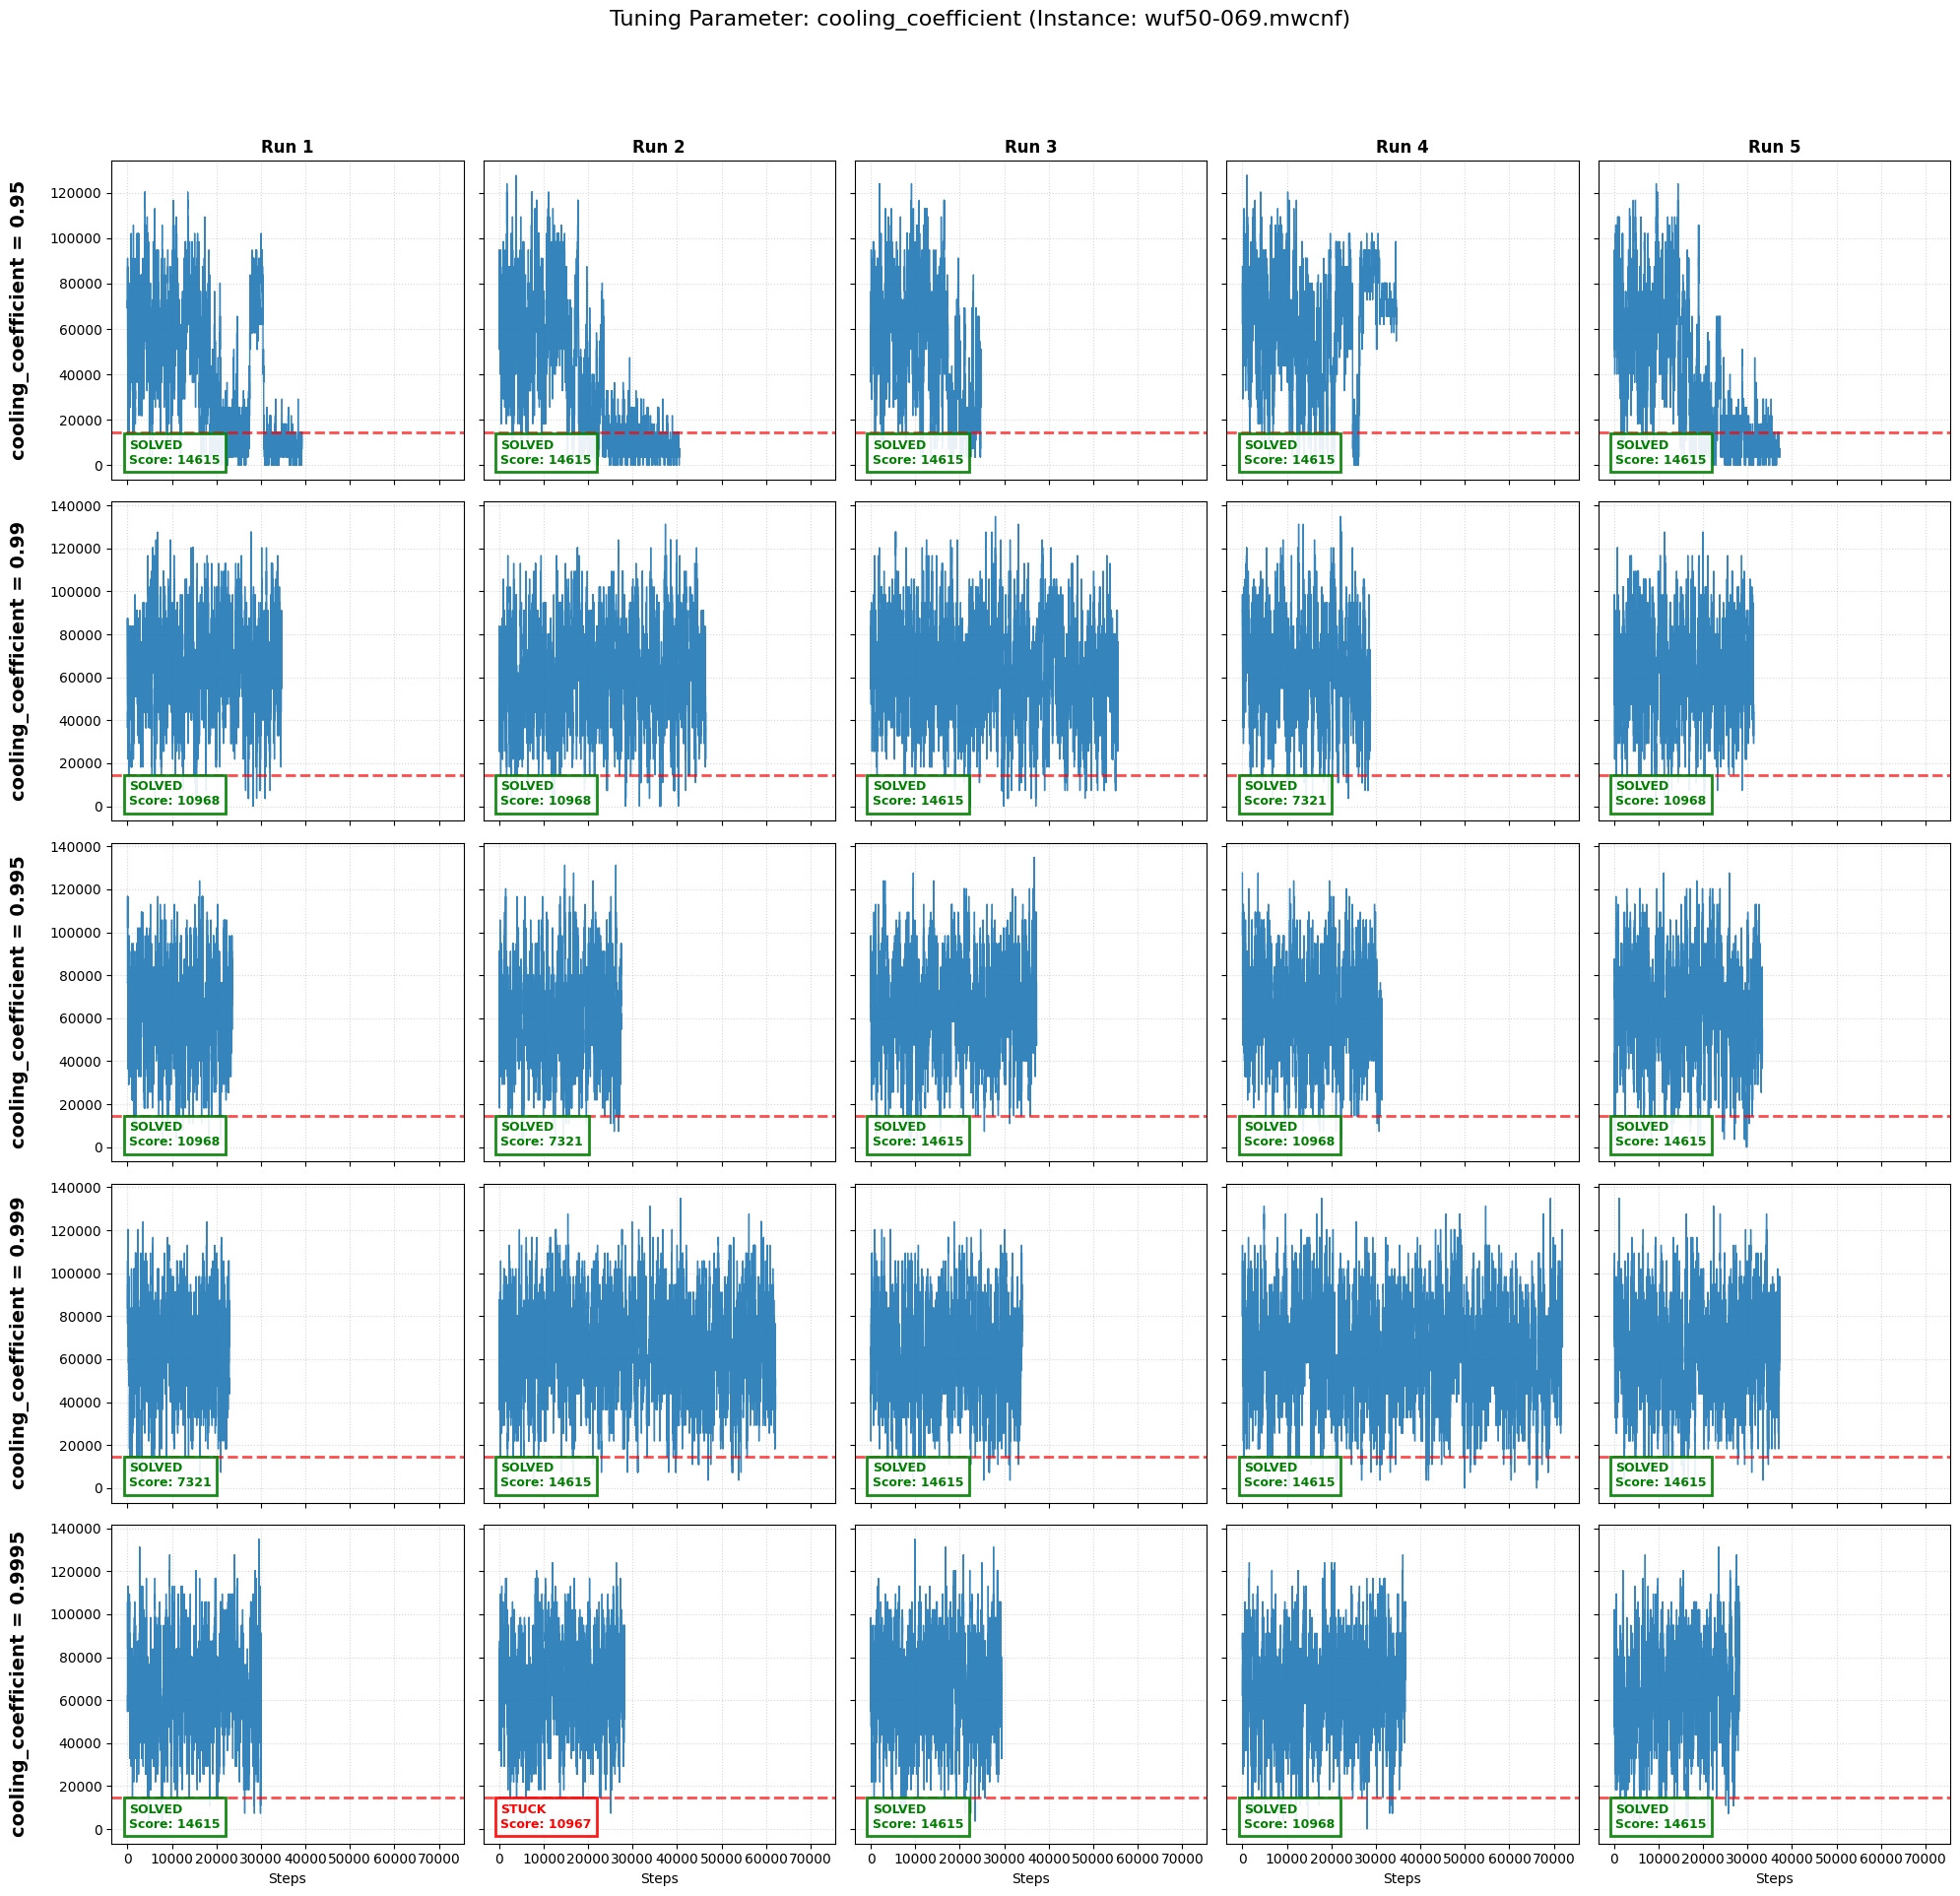


cooling_coefficient | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
0.95            | 5    | 5      | 5       | 14615.0    | 100.00%  | 35316.0  
0.99            | 5    | 5      | 1       | 10968.0    | 75.05 %  | 39370.8  
0.995           | 5    | 5      | 2       | 11697.4    | 80.04 %  | 30607.2  
0.999           | 5    | 5      | 4       | 13156.2    | 90.02 %  | 45649.2  
0.9995          | 5    | 4      | 3       | 10962.6    | 75.01 %  | 30476.4  


In [18]:
base_params = {
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": best_fitness_coeff_param,
    "P0": best_p0_param
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="cooling_coefficient",
    param_values=[0.95, 0.99,0.995, 0.999,0.9995],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [35]:
best_cooling_coeff = 0.95

# 2.5) `Equilibrium_steps`
- je to parametr úzce spjatý s rychlostí chlazení, takže bude dávat smysl ho nastavit hned jako následující

--- Tuning 'equilibrium_steps' on wuf50-069.mwcnf (25 total runs) ---
Testing equilibrium_steps = 1...
Testing equilibrium_steps = 3...
Testing equilibrium_steps = 4...
Testing equilibrium_steps = 6...
Testing equilibrium_steps = 8...


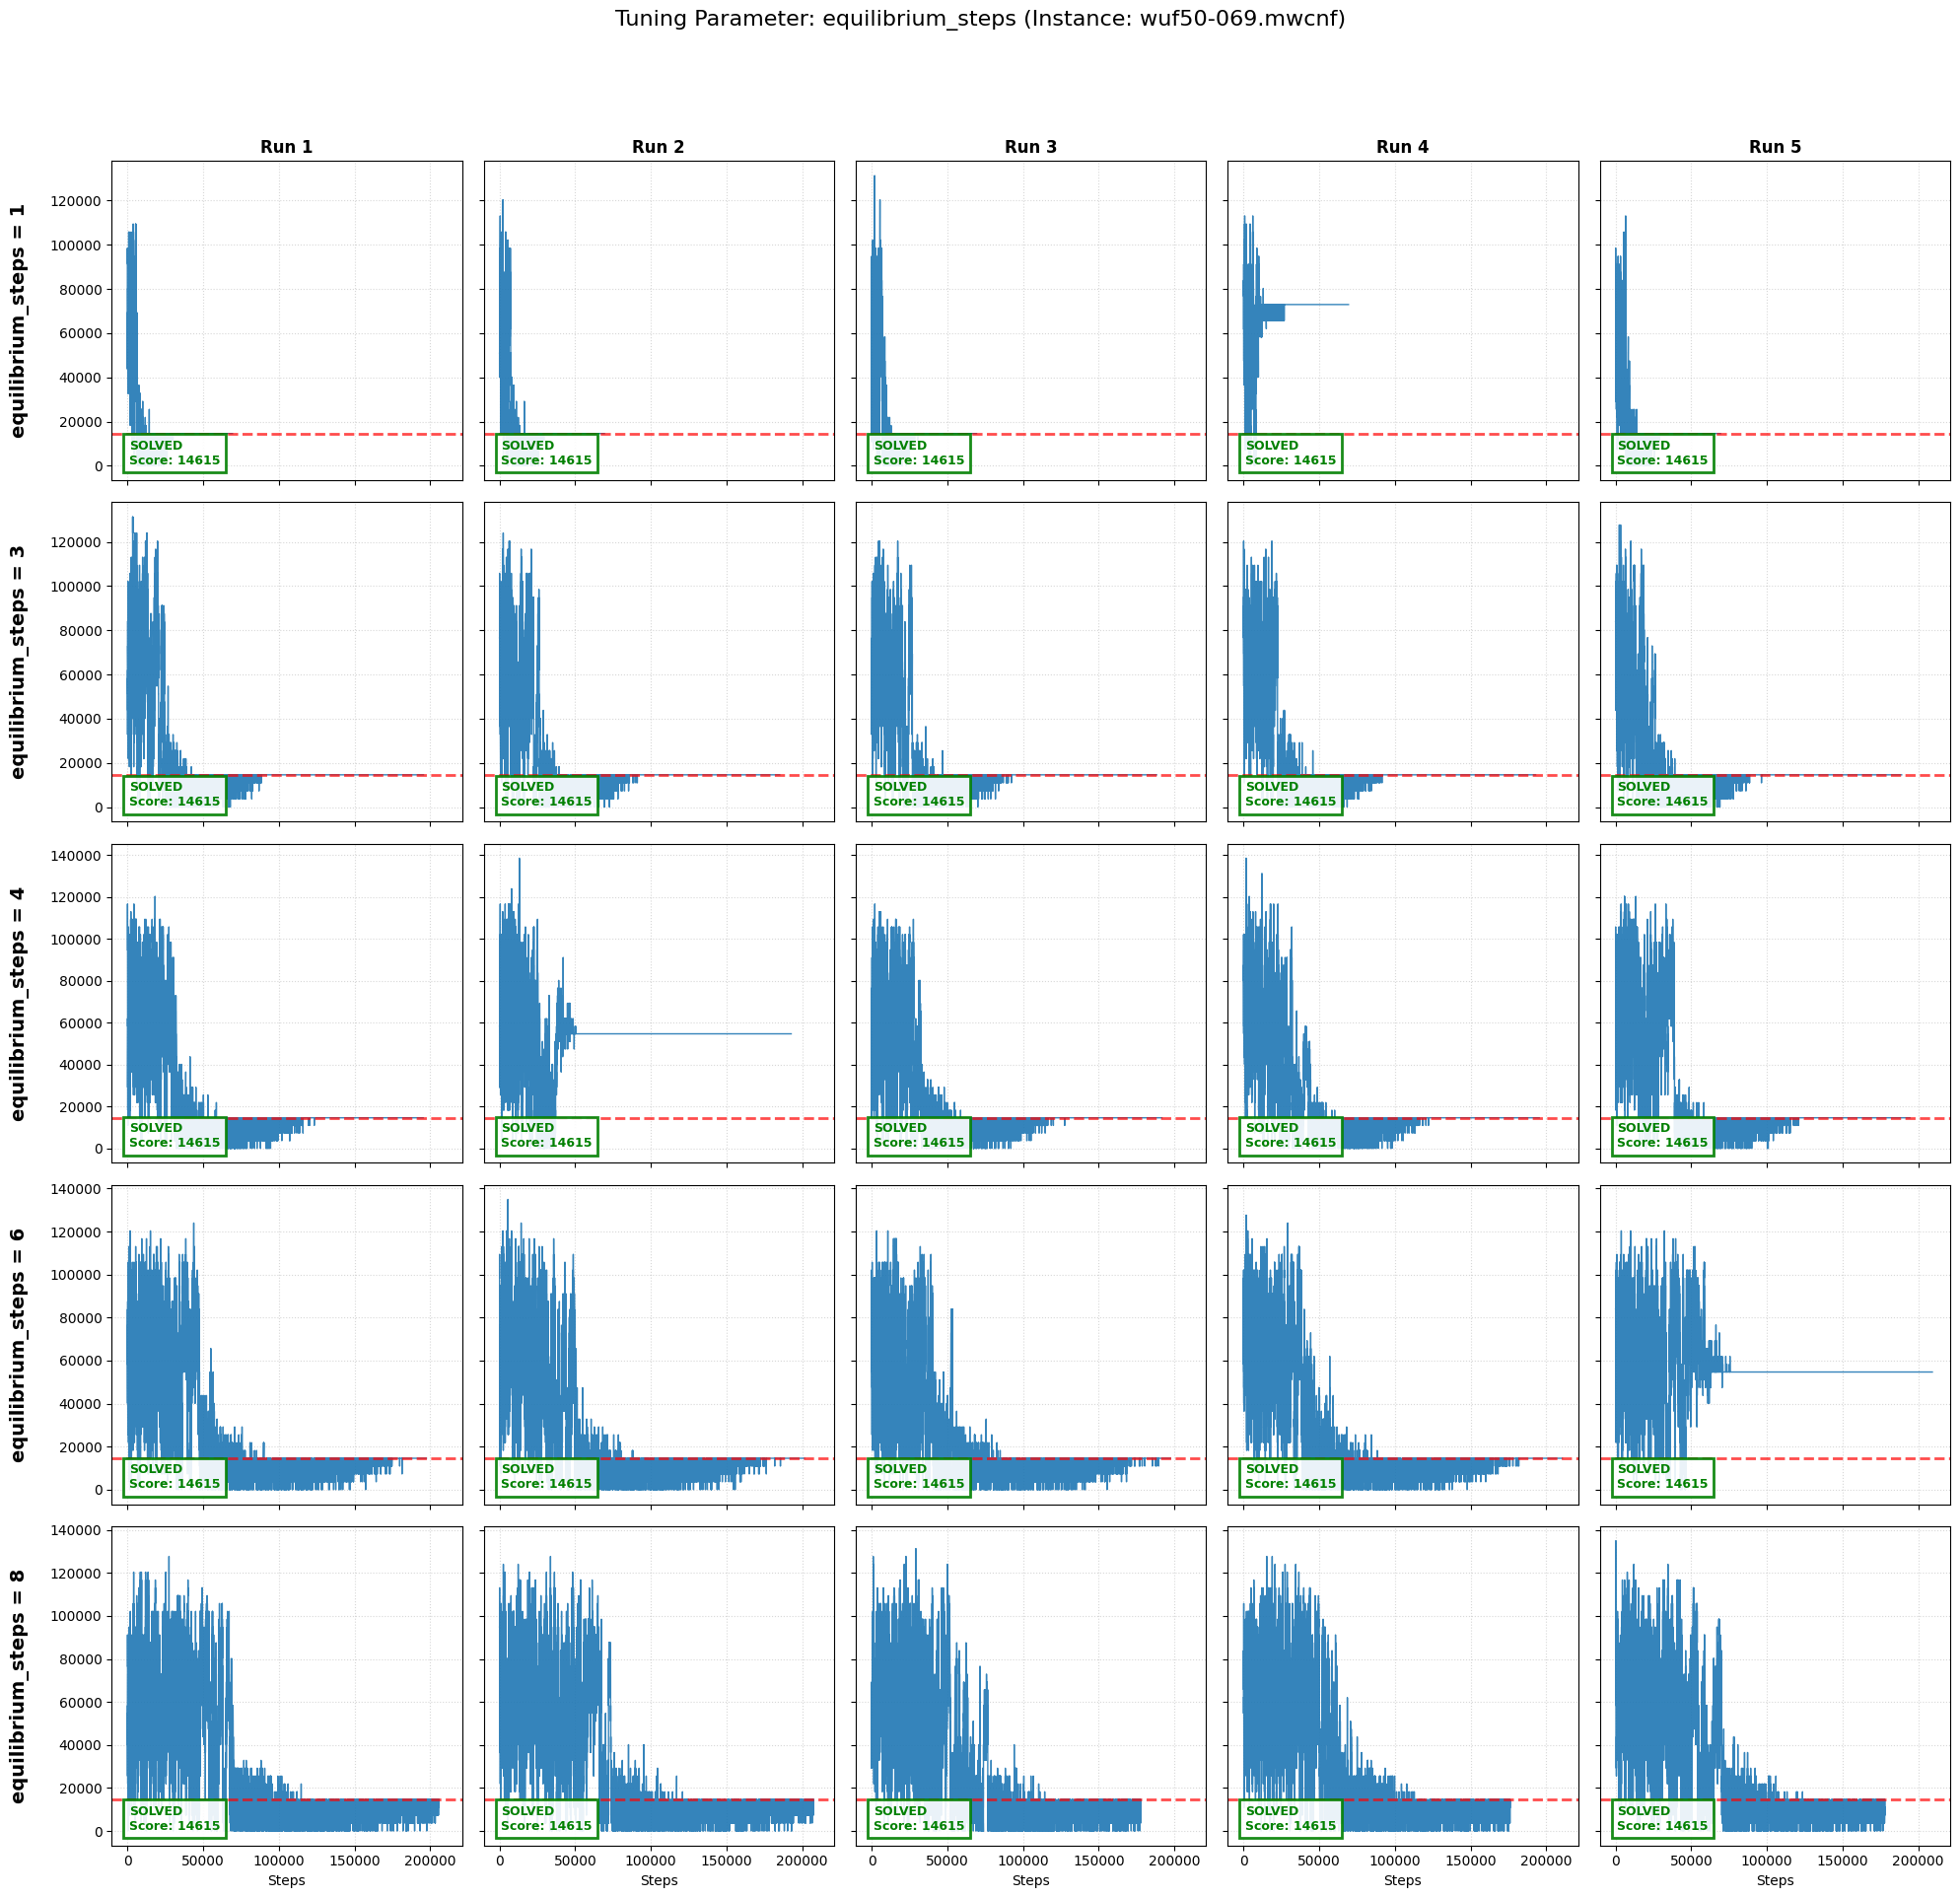


equilibrium_steps | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
1               | 5    | 5      | 5       | 14615.0    | 100.00%  | 69324.0  
3               | 5    | 5      | 5       | 14615.0    | 100.00%  | 190183.2 
4               | 5    | 5      | 5       | 14615.0    | 100.00%  | 193932.8 
6               | 5    | 5      | 5       | 14615.0    | 100.00%  | 203263.2 
8               | 5    | 5      | 5       | 14615.0    | 100.00%  | 189049.6 


In [21]:
base_params = {
    "cooling_coefficient": best_cooling_coeff,
    "max_steps_without_improvement": 800,
    "fitness_coefficient": best_fitness_coeff_param,
    "P0": best_p0_param,    
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="equilibrium_steps",
    param_values=[1,3,4,6,8],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

4 - stabilita a rychlejsi nez 6

In [36]:
best_equilibrium_steps = 8

# 2.6) `max_steps_without_improvement`

--- Tuning 'max_steps_without_improvement' on wuf50-069.mwcnf (20 total runs) ---
Testing max_steps_without_improvement = 200...
Testing max_steps_without_improvement = 400...
Testing max_steps_without_improvement = 800...
Testing max_steps_without_improvement = 1200...


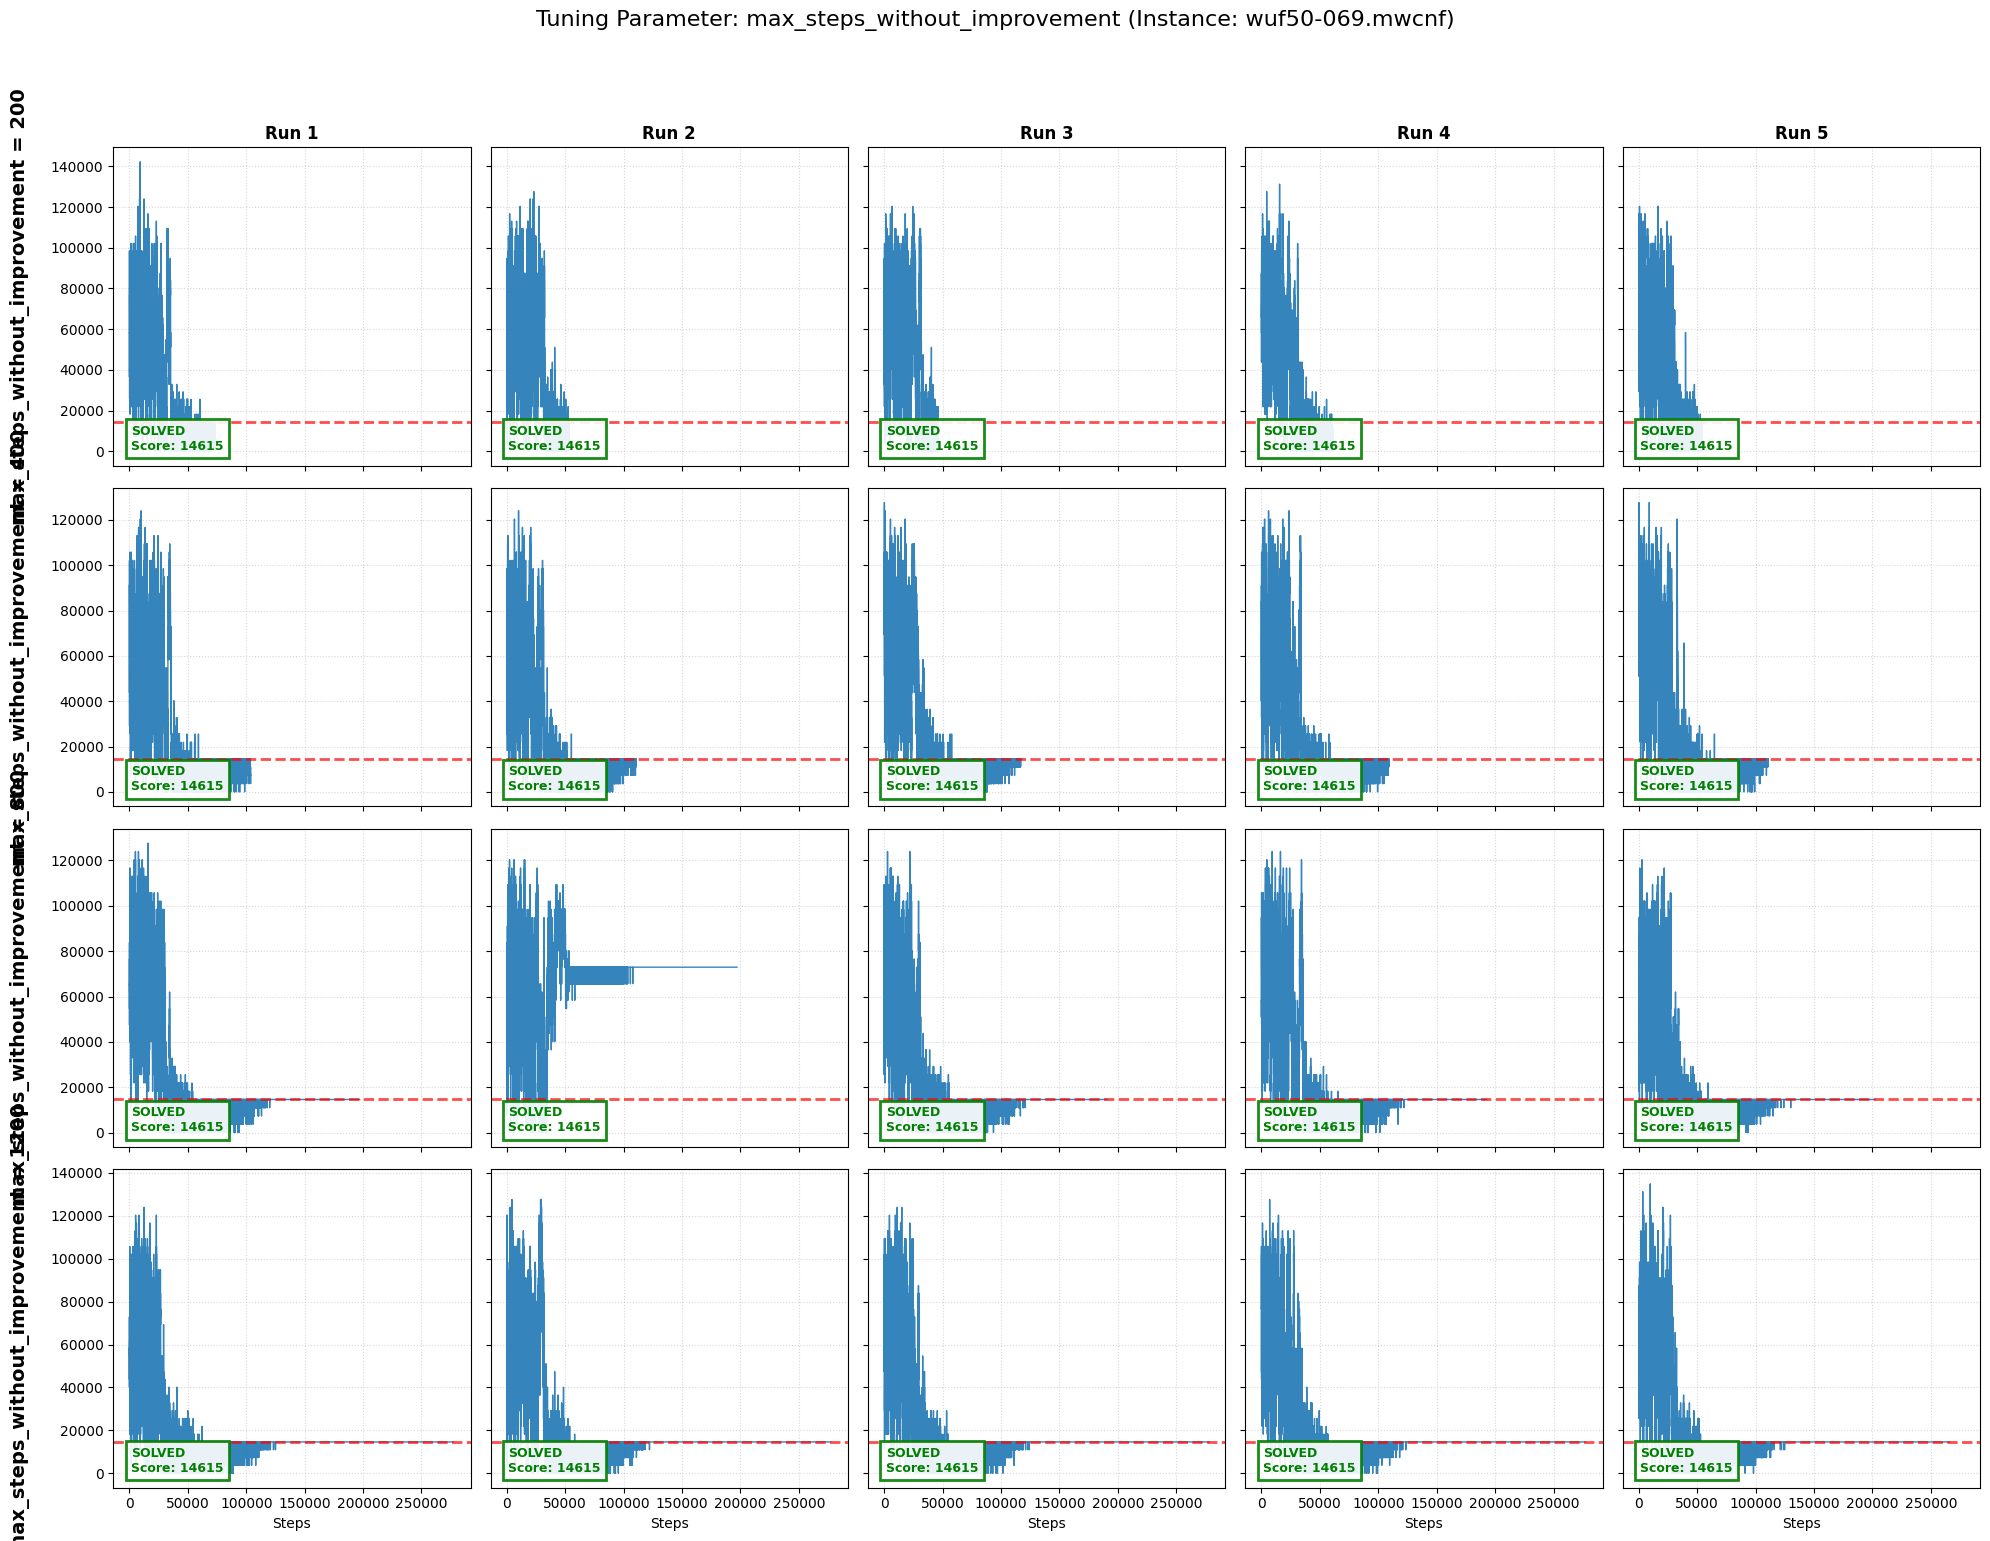


max_steps_without_improvement | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
200             | 5    | 5      | 5       | 14615.0    | 100.00%  | 57552.0  
400             | 5    | 5      | 5       | 14615.0    | 100.00%  | 110395.2 
800             | 5    | 5      | 5       | 14615.0    | 100.00%  | 196025.6 
1200            | 5    | 5      | 5       | 14615.0    | 100.00%  | 275203.2 


In [23]:
base_params = {
    "cooling_coefficient": best_cooling_coeff,
    "fitness_coefficient": best_fitness_coeff_param,
    "equilibrium_steps": best_equilibrium_steps,
    "P0": best_p0_param
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="max_steps_without_improvement",
    param_values=[200,400,800,1200],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [33]:
best_max_steps_without_improvement = 800

In [39]:
FINAL_CONFIG = {
    "P0": best_p0_param, 
    "cooling_coefficient": best_cooling_coeff,
    "equilibrium_steps": best_equilibrium_steps, 
    "max_steps_without_improvement": best_max_steps_without_improvement, 
    "fitness_coefficient": best_fitness_coeff_param
}

# Test na instancích s 20 a 75 proměnnými

In [26]:
instance_paths_20 = [os.path.join(wuf_20_m_path,x) for x in os.listdir(wuf_20_m_path)[:4]]
solutions_wuf_20_m = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-M-opt.dat"))

--- Starting Baseline configuration on 20 variable instances (16 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 4, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/4: wuf20-0463.mwcnf
Processing Instance 2/4: wuf20-0426.mwcnf
Processing Instance 3/4: wuf20-0762.mwcnf
Processing Instance 4/4: wuf20-0727.mwcnf


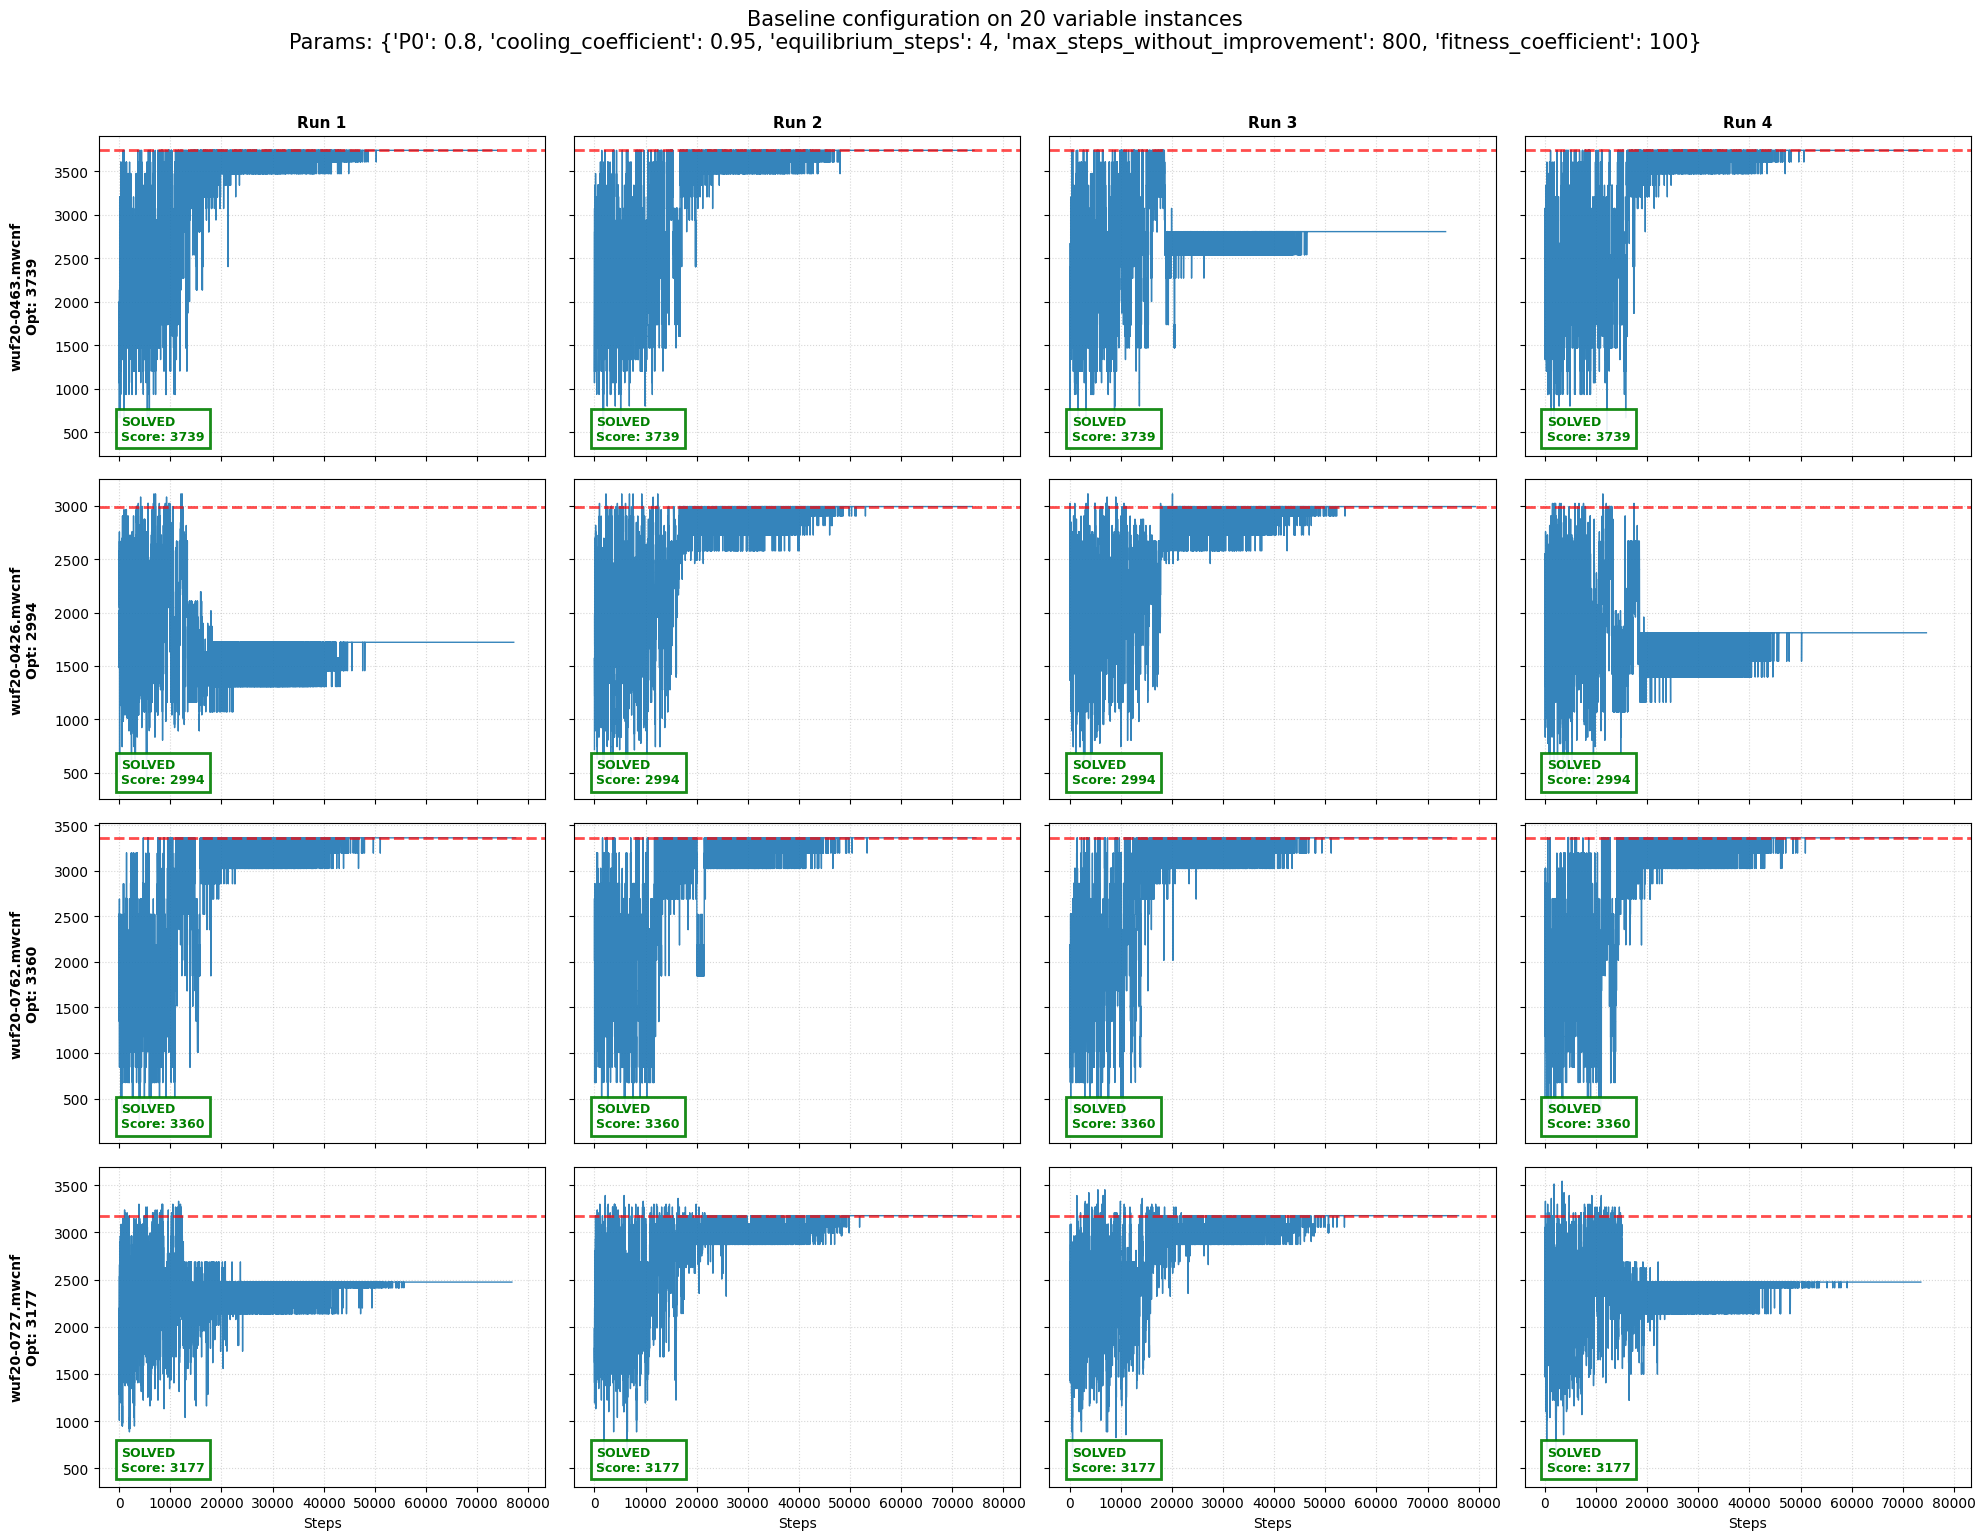


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf20-0463.mwcnf          | 4    | 4      | 4       | 3739.0     | 100.00%  | 73983.0  
wuf20-0426.mwcnf          | 4    | 4      | 4       | 2994.0     | 100.00%  | 76258.0  
wuf20-0762.mwcnf          | 4    | 4      | 4       | 3360.0     | 100.00%  | 75075.0  
wuf20-0727.mwcnf          | 4    | 4      | 4       | 3177.0     | 100.00%  | 75075.0  


In [27]:
results = evaluate_algorithm_performance(instance_paths_20,solutions_wuf_20_m,FINAL_CONFIG,4,"Baseline configuration on 20 variable instances")

# 75 proměnných

--- Starting Baseline configuration on 75 variable instances (16 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 4, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/4: wuf75-03.mwcnf
Processing Instance 2/4: wuf75-059.mwcnf
Processing Instance 3/4: wuf75-099.mwcnf
Processing Instance 4/4: wuf75-021.mwcnf


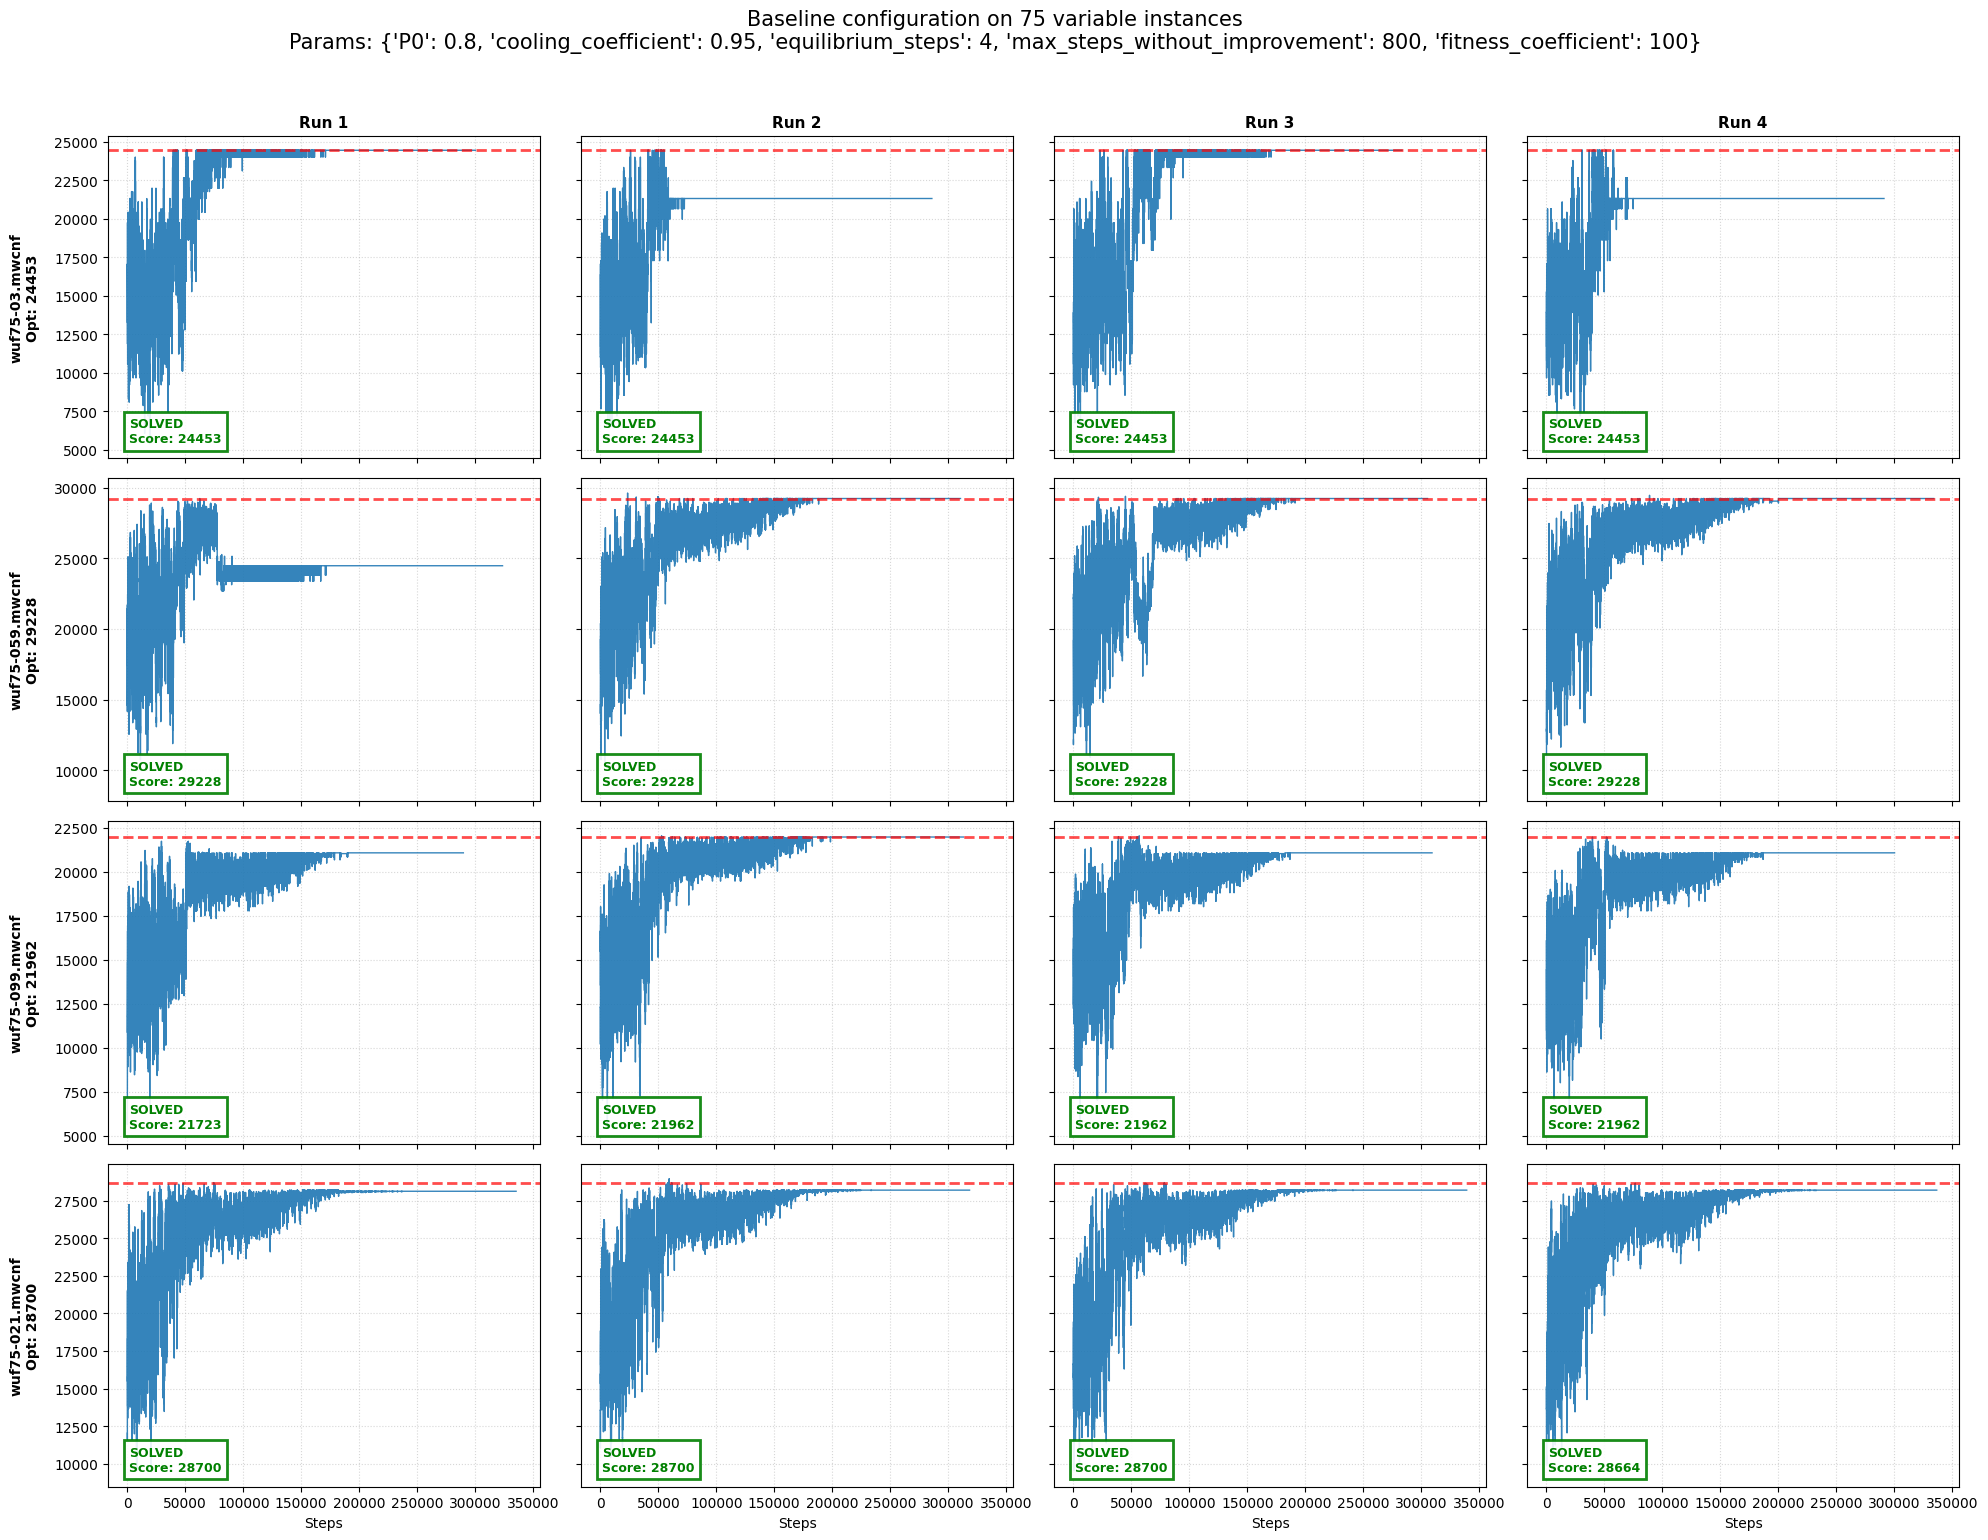


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf75-03.mwcnf            | 4    | 4      | 4       | 24453.0    | 100.00%  | 290225.0 
wuf75-059.mwcnf           | 4    | 4      | 4       | 29228.0    | 100.00%  | 318500.0 
wuf75-099.mwcnf           | 4    | 4      | 3       | 21902.2    | 99.73 %  | 303225.0 
wuf75-021.mwcnf           | 4    | 4      | 3       | 28691.0    | 99.97 %  | 332475.0 


In [28]:
instance_paths_75 = [os.path.join(wuf_75_m_path,x) for x in os.listdir(wuf_75_m_path)[:4]]
solutions_wuf_75_m = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-M-opt.dat"))
results = evaluate_algorithm_performance(instance_paths_75,solutions_wuf_75_m,FINAL_CONFIG,4,"Baseline configuration on 75 variable instances")

# Jiné generování Vah

--- Starting Baseline configuration on 50 variable instances (16 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 4, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/4: wuf50-0323.mwcnf
Processing Instance 2/4: wuf50-0366.mwcnf
Processing Instance 3/4: wuf50-069.mwcnf
Processing Instance 4/4: wuf50-094.mwcnf


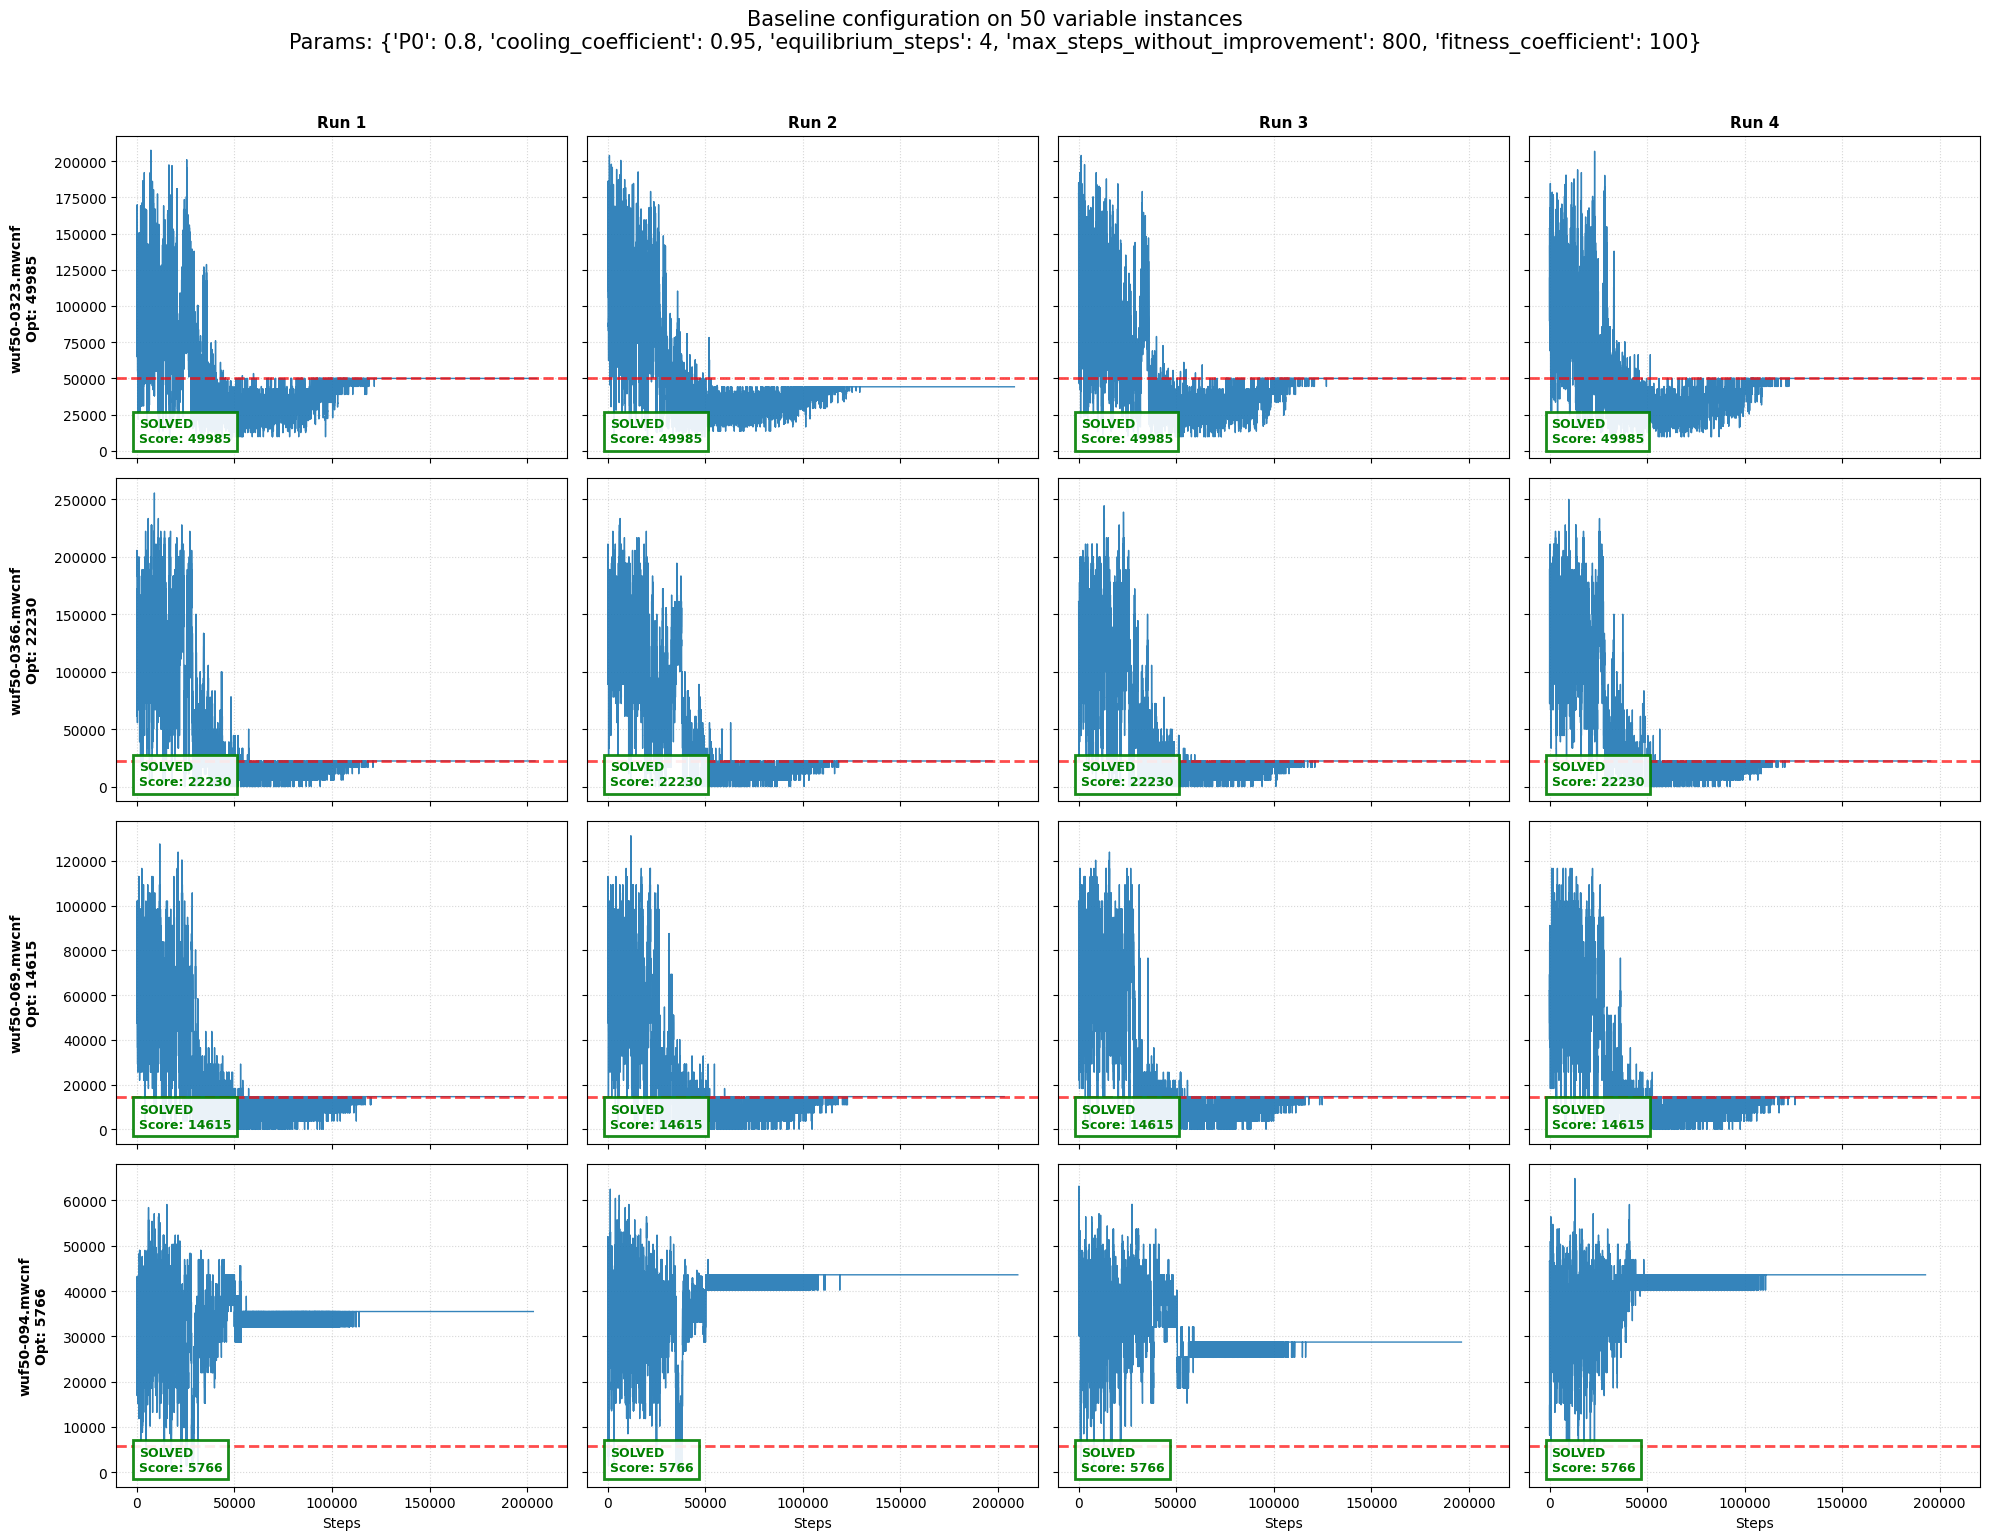


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-0323.mwcnf          | 4    | 4      | 4       | 49985.0    | 100.00%  | 200342.0 
wuf50-0366.mwcnf          | 4    | 4      | 4       | 22230.0    | 100.00%  | 199470.0 
wuf50-069.mwcnf           | 4    | 4      | 4       | 14615.0    | 100.00%  | 200124.0 
wuf50-094.mwcnf           | 4    | 4      | 4       | 5766.0     | 100.00%  | 200560.0 


In [29]:
instance_paths_50 = [os.path.join(wuf_50_r_path,x) for x in os.listdir(wuf_50_r_path)[:4]]
solutions_wuf_50_r = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-R-opt.dat"))
results = evaluate_algorithm_performance(instance_paths_50,solutions_wuf_50_r,FINAL_CONFIG,4,"Baseline configuration on 50 variable instances")

--- Starting Baseline configuration on 50 variable instances (16 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 4, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/4: wuf50-0788.mwcnf
Processing Instance 2/4: wuf50-013.mwcnf
Processing Instance 3/4: wuf50-0431.mwcnf
Processing Instance 4/4: wuf50-0474.mwcnf


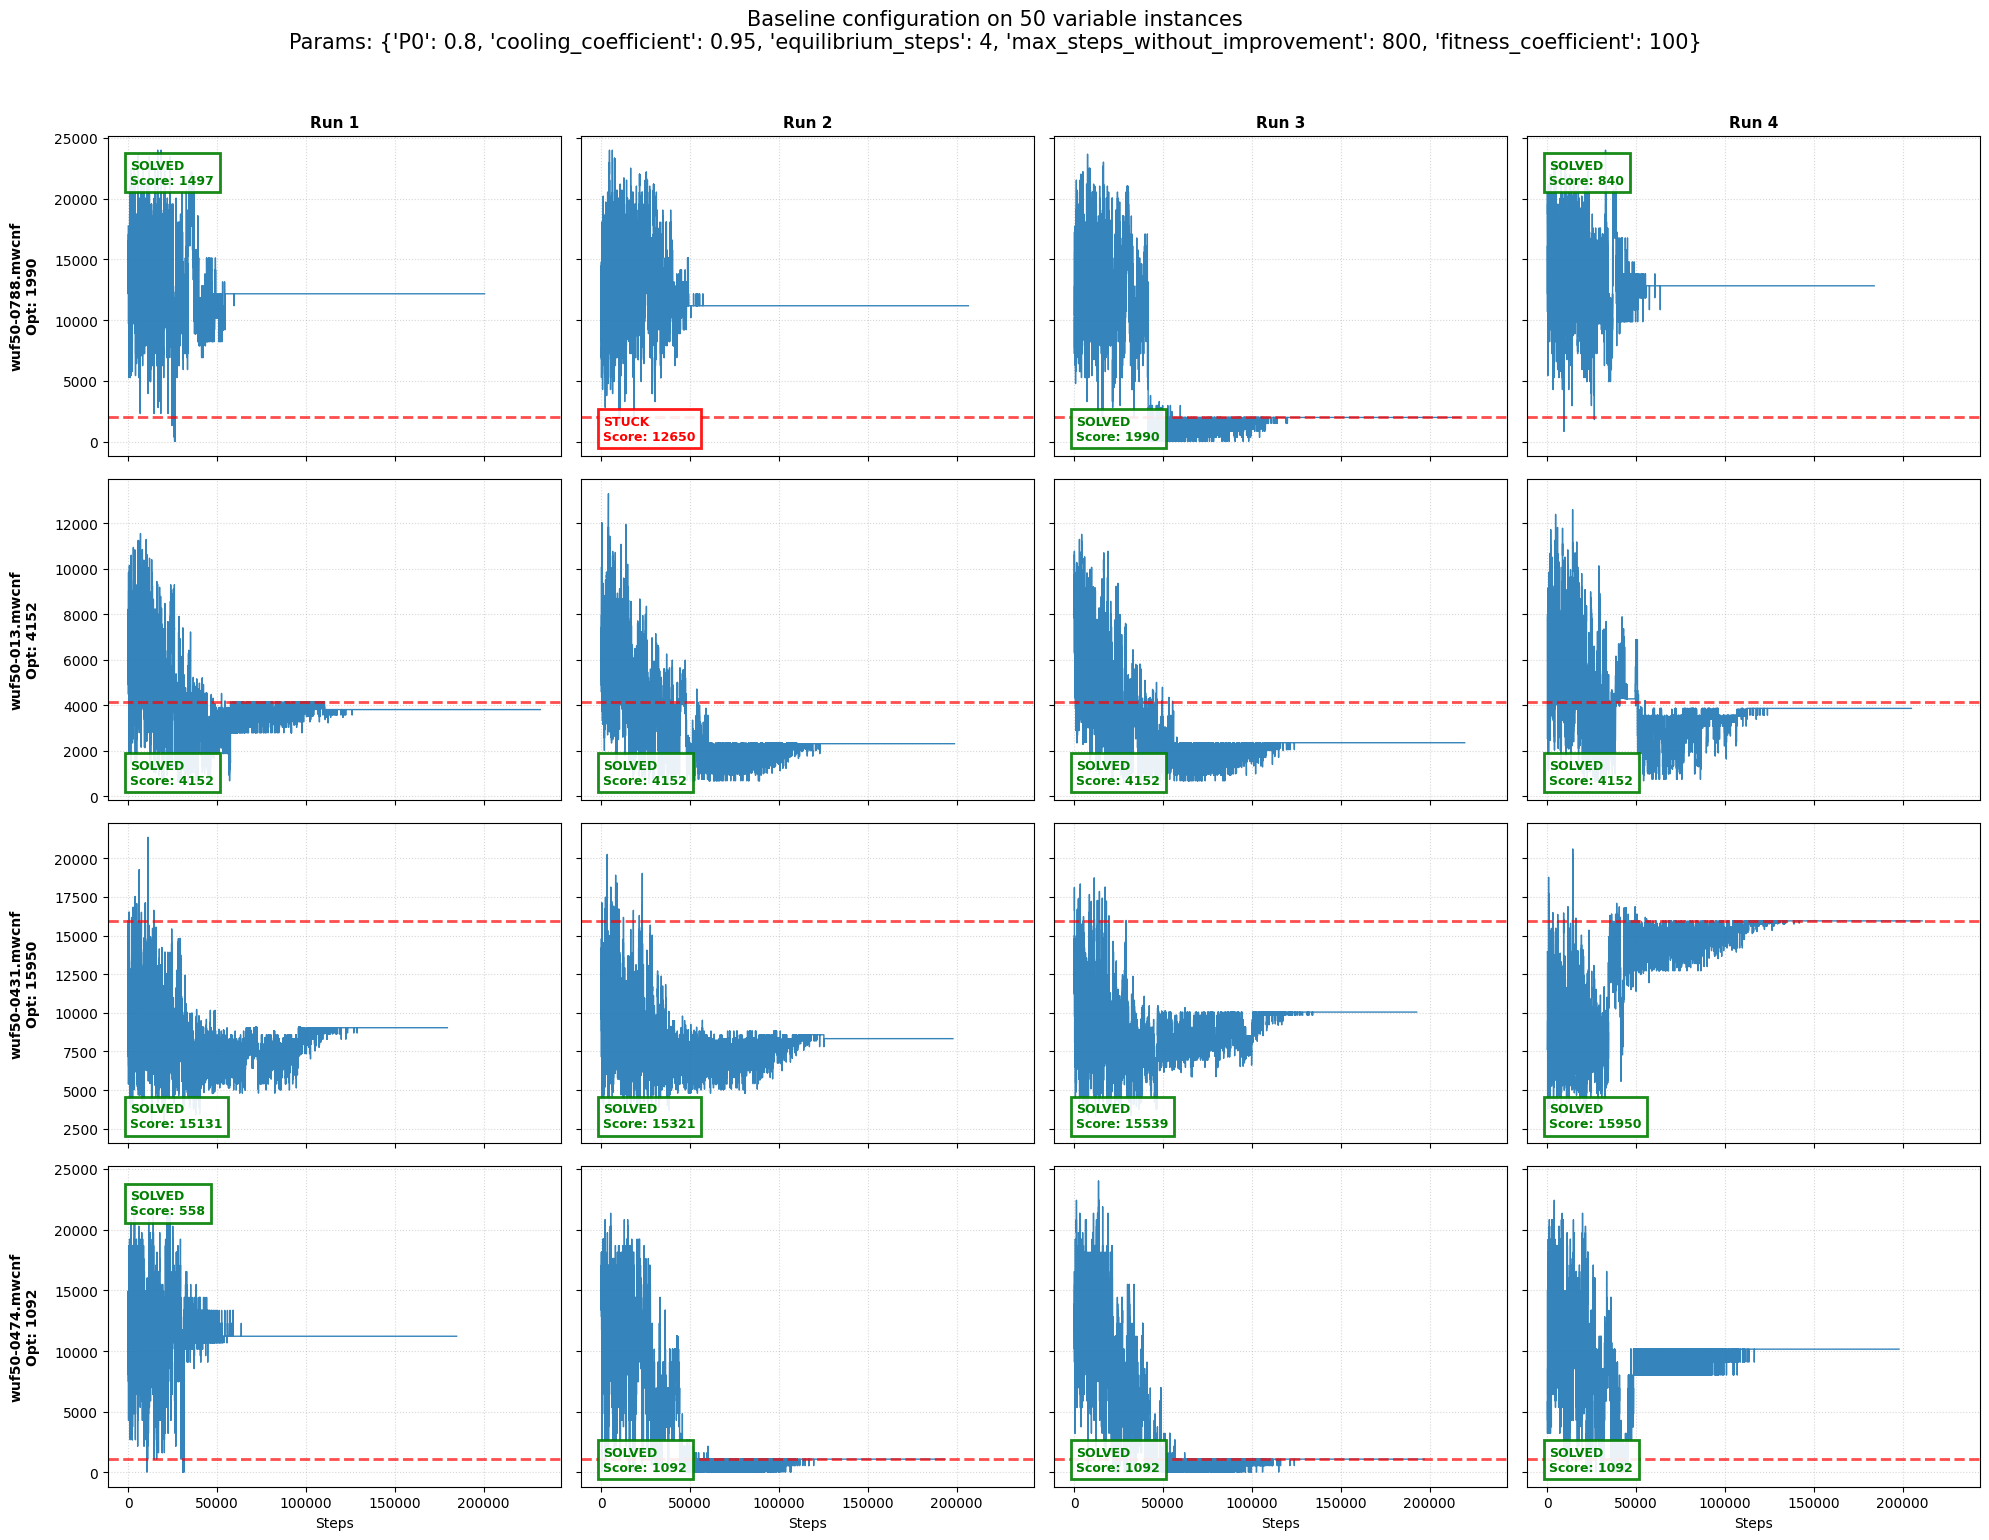


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-0788.mwcnf          | 4    | 3      | 1       | 1442.3     | 72.48 %  | 202086.0 
wuf50-013.mwcnf           | 4    | 4      | 4       | 4152.0     | 100.00%  | 213858.0 
wuf50-0431.mwcnf          | 4    | 4      | 1       | 15485.2    | 97.09 %  | 195328.0 
wuf50-0474.mwcnf          | 4    | 4      | 3       | 958.5      | 87.77 %  | 193366.0 


In [30]:

instance_paths_50_q = [os.path.join(wuf_50_q_path,x) for x in os.listdir(wuf_50_q_path)[100:104]]
solutions_wuf_50_q = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-Q-opt.dat"))
results = evaluate_algorithm_performance(instance_paths_50_q,solutions_wuf_50_q,FINAL_CONFIG,4,"Baseline configuration on 50 variable instances")

# Blackbox Fáze

In [28]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [40]:
print(FINAL_CONFIG)

{'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 8, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}


In [41]:
from worker_utils import run_blackbox_parallel

In [42]:

instance_paths = [os.path.join(wuf_20_r_path,x) for x in os.listdir(wuf_20_r_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-R-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=10 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-R")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 10
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
1      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
2      wuf20-0911.mwcnf      True     True  23689    23689        0.0  74256   
3      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
4      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0572.mwcnf      True     True   3049     3049        0.0  73528   
99996  wuf20-0572.mwcnf      True     True   3049     3049        0.0  75712   
99997  wuf20-0572.mwcnf      True     True   3049     3049        0.0  77168   
99998  wuf20-0572.mwcnf      True     True   3049     3049        0.0  74256   
99999  wuf20-0572.mwcnf      True     True   3049     3049        0.0  73528   

           Time  
0      0.383580  
1      0.377607  
2      0.400077  
3      0.378433  
4      0.372999  
...         ...  
99995  0.360067  
99996  0.417707  
99997  0.426511  
99998  0.361302  
99999  0.351273  

[100000 rows x 8 columns]

In [43]:
instance_paths = [os.path.join(wuf_20_m_path,x) for x in os.listdir(wuf_20_m_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-M-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-M")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
1      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
2      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
3      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
4      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0572.mwcnf      True     True   3477     3477        0.0  74984   
99996  wuf20-0572.mwcnf      True     True   3477     3477        0.0  73528   
99997  wuf20-0572.mwcnf      True     True   3477     3477        0.0  73528   
99998  wuf20-0572.mwcnf      True     True   3477     3477        0.0  74256   
99999  wuf20-0572.mwcnf      True     True   3477     3477        0.0  75712   

           Time  
0      0.394691  
1      0.548268  
2      0.445367  
3      0.449494  
4      0.444634  
...         ...  
99995  0.354437  
99996  0.398175  
99997  0.349683  
99998  0.347553  
99999  0.357235  

[100000 rows x 8 columns]

In [44]:
instance_paths = [os.path.join(wuf_20_q_path,x) for x in os.listdir(wuf_20_q_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-Q-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-Q")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True   2247     2247        0.0  73528   
1      wuf20-0911.mwcnf      True     True   2247     2247        0.0  74256   
2      wuf20-0911.mwcnf      True     True   2247     2247        0.0  75712   
3      wuf20-0911.mwcnf      True     True   2247     2247        0.0  73528   
4      wuf20-0911.mwcnf      True     True   2247     2247        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0537.mwcnf      True     True    417      417        0.0  73528   
99996  wuf20-0537.mwcnf      True     True    417      417        0.0  74984   
99997  wuf20-0537.mwcnf      True     True    417      417        0.0  74256   
99998  wuf20-0537.mwcnf      True     True    417      417        0.0  74256   
99999  wuf20-0537.mwcnf      True     True    417      417        0.0  73528   

           Time  
0      0.446847  
1      0.433554  
2      0.460243  
3      0.439297  
4      0.423190  
...         ...  
99995  0.334339  
99996  0.338266  
99997  0.332106  
99998  0.348992  
99999  0.331954  

[100000 rows x 8 columns]

In [45]:
instance_paths = [os.path.join(wuf_20_n_path,x) for x in os.listdir(wuf_20_n_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-N-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-N")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
1      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
2      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
3      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
4      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0537.mwcnf      True     True  18167    18167        0.0  73528   
99996  wuf20-0537.mwcnf      True     True  18167    18167        0.0  73528   
99997  wuf20-0537.mwcnf      True     True  18167    18167        0.0  74256   
99998  wuf20-0537.mwcnf      True     True  18167    18167        0.0  74256   
99999  wuf20-0537.mwcnf      True     True  18167    18167        0.0  74256   

           Time  
0      0.433480  
1      0.471480  
2      0.432558  
3      0.435537  
4      0.414869  
...         ...  
99995  0.331277  
99996  0.332314  
99997  0.333755  
99998  0.333068  
99999  0.332929  

[100000 rows x 8 columns]

In [46]:
instance_paths = [os.path.join(wuf_50_n_path,x) for x in os.listdir(wuf_50_n_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-N-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-50-218-N")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success   Score  Optimum  Rel_Error  \
0      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
1      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
2      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
3      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
4      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
...                 ...       ...      ...     ...      ...        ...   
99995  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99996  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99997  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99998  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99999  wuf50-0277.mwcnf      True     True  259292   259292        0.0   

        Steps      Time  
0      176144  1.183171  
1      186608  1.143567  
2      202304  1.302799  
3      184864  1.212153  
4      176144  1.074071  
...       ...       ...  
99995  197072  0.941950  
99996  214512  1.034257  
99997  207536  0.978449  
99998  224976  1.062096  
99999  186608  0.861523  

[100000 rows x 8 columns]

In [47]:
instance_paths = [os.path.join(wuf_50_r_path,x) for x in os.listdir(wuf_50_r_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-R-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-50-218-R")

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

In [48]:
instance_paths = [os.path.join(wuf_50_m_path,x) for x in os.listdir(wuf_50_m_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-M-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-50-218-M")
display(df_results)
print(df_results["Rel_Error"].mean())

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error   Steps  \
0      wuf50-0286.mwcnf      True     True  20379    20379        0.0  188352   
1      wuf50-0286.mwcnf      True     True  20379    20379        0.0  176144   
2      wuf50-0286.mwcnf      True     True  20379    20379        0.0  218000   
3      wuf50-0286.mwcnf      True     True  20379    20379        0.0  198816   
4      wuf50-0286.mwcnf      True     True  20379    20379        0.0  212768   
...                 ...       ...      ...    ...      ...        ...     ...   
99995  wuf50-0277.mwcnf      True     True  19728    19728        0.0  223232   
99996  wuf50-0277.mwcnf      True     True  19728    19728        0.0  218000   
99997  wuf50-0277.mwcnf      True     True  19728    19728        0.0  216256   
99998  wuf50-0277.mwcnf      True     True  19728    19728        0.0  211024   
99999  wuf50-0277.mwcnf      True     True  19728    19728        0.0  221488   

           Time  
0      1.148536  
1      1.040327  
2      1.316045  
3      1.202231  
4      1.101906  
...         ...  
99995  1.019140  
99996  1.039043  
99997  1.031183  
99998  0.976260  
99999  1.035590  

[100000 rows x 8 columns]

0.008190077557986793


In [ ]:
instance_paths = [os.path.join(wuf_50_q_path,x) for x in os.listdir(wuf_50_q_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-Q-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=10 # Uses all cores automatically
)
df_results.to_csv("wuf-50-218-Q")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 10
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...


In [ ]:
instance_paths = [os.path.join(wuf_75_q_path,x) for x in os.listdir(wuf_75_q_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-Q-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=50,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-Q")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 100
Repeats per Instance: 20
Total Runs: 2000
Parallel Workers: 12
Completed 1/100 instances...
Completed 2/100 instances...
Completed 3/100 instances...
Completed 4/100 instances...
Completed 5/100 instances...
Completed 6/100 instances...
Completed 7/100 instances...
Completed 8/100 instances...
Completed 9/100 instances...
Completed 10/100 instances...
Completed 11/100 instances...
Completed 12/100 instances...
Completed 13/100 instances...
Completed 14/100 instances...
Completed 15/100 instances...
Completed 16/100 instances...
Completed 17/100 instances...
Completed 18/100 instances...
Completed 19/100 instances...
Completed 20/100 instances...
Completed 21/100 instances...
Completed 22/100 instances...
Completed 23/100 instances...
Completed 24/100 instances...
Completed 25/100 instances...
Completed 26/100 instances...
Completed 27/100 instances...
Completed 28/100 instances...
Completed 29/100 instances...
Completed 30/100 instan

Instance  Success  Score  Optimum  Rel_Error   Steps      Time
0      wuf75-03.mwcnf     True    297      297   0.000000  207900  1.383804
1      wuf75-03.mwcnf     True    297      297   0.000000  175500  1.039087
2      wuf75-03.mwcnf     True    297      297   0.000000  224400  1.468401
3      wuf75-03.mwcnf     True    297      297   0.000000  194700  1.087733
4      wuf75-03.mwcnf     True    297      297   0.000000  214500  1.325046
...               ...      ...    ...      ...        ...     ...       ...
1995  wuf75-010.mwcnf    False   6008     6976   0.138761  212100  0.985951
1996  wuf75-010.mwcnf    False   5739     6976   0.177322  168300  0.758077
1997  wuf75-010.mwcnf    False   6401     6976   0.082425  196800  0.910552
1998  wuf75-010.mwcnf     True   6976     6976   0.000000  278400  1.308160
1999  wuf75-010.mwcnf    False   6236     6976   0.106078  229500  1.046367

[2000 rows x 7 columns]

In [ ]:
instance_paths = [os.path.join(wuf_75_m_path,x) for x in os.listdir(wuf_75_m_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-M-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=50,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-M")
display(df_results)
print(df_results['Rel_Error'].mean())
print(df_results['Success'].sum())

--- Starting Black Box Evaluation ---
Instances: 100
Repeats per Instance: 20
Total Runs: 2000
Parallel Workers: 12
Completed 1/100 instances...
Completed 2/100 instances...
Completed 3/100 instances...
Completed 4/100 instances...
Completed 5/100 instances...
Completed 6/100 instances...
Completed 7/100 instances...
Completed 8/100 instances...
Completed 9/100 instances...
Completed 10/100 instances...
Completed 11/100 instances...
Completed 12/100 instances...
Completed 13/100 instances...
Completed 14/100 instances...
Completed 15/100 instances...
Completed 16/100 instances...
Completed 17/100 instances...
Completed 18/100 instances...
Completed 19/100 instances...
Completed 20/100 instances...
Completed 21/100 instances...
Completed 22/100 instances...
Completed 23/100 instances...
Completed 24/100 instances...
Completed 25/100 instances...
Completed 26/100 instances...
Completed 27/100 instances...
Completed 28/100 instances...
Completed 29/100 instances...
Completed 30/100 instan

Instance  Success  Score  Optimum  Rel_Error   Steps      Time
0      wuf75-03.mwcnf     True  24453    24453   0.000000  214800  1.326056
1      wuf75-03.mwcnf     True  24453    24453   0.000000  216600  1.320075
2      wuf75-03.mwcnf     True  24453    24453   0.000000  223800  1.366110
3      wuf75-03.mwcnf     True  24453    24453   0.000000  214500  1.289507
4      wuf75-03.mwcnf     True  24453    24453   0.000000  212100  1.315245
...               ...      ...    ...      ...        ...     ...       ...
1995  wuf75-010.mwcnf     True  18638    18638   0.000000  267900  1.247617
1996  wuf75-010.mwcnf    False  18622    18638   0.000858  248700  1.151293
1997  wuf75-010.mwcnf    False  18636    18638   0.000107  228900  1.036679
1998  wuf75-010.mwcnf     True  18638    18638   0.000000  262500  1.190311
1999  wuf75-010.mwcnf    False  18622    18638   0.000858  242400  1.080864

[2000 rows x 7 columns]

0.015575153704304606
1527


In [ ]:
instance_paths = [os.path.join(wuf_75_r_path,x) for x in os.listdir(wuf_75_r_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-R-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=20,
    max_workers=10 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-R")
display(df_results)
print(df_results['Rel_Error'].mean())
print(df_results['Success'].sum())
print(df_results["Is_Valid"].sum())

--- Starting Black Box Evaluation ---
Instances: 10
Repeats per Instance: 20
Total Runs: 200
Parallel Workers: 10
Completed 1/10 instances...
Completed 2/10 instances...
Completed 3/10 instances...
Completed 4/10 instances...
Completed 5/10 instances...
Completed 6/10 instances...
Completed 7/10 instances...
Completed 8/10 instances...
Completed 9/10 instances...
Completed 10/10 instances...
--- Evaluation Complete ---


Instance  Is_Valid  Success  Score  Optimum  Rel_Error    Steps  \
0     wuf75-03.mwcnf      True     True   4579     4579   0.000000   649500   
1     wuf75-03.mwcnf      True    False   2307     4579   0.496178   423600   
2     wuf75-03.mwcnf      True     True   4579     4579   0.000000   492000   
3     wuf75-03.mwcnf      True     True   4579     4579   0.000000   627900   
4     wuf75-03.mwcnf      True     True   4579     4579   0.000000   614400   
..               ...       ...      ...    ...      ...        ...      ...   
195  wuf75-080.mwcnf      True     True  78623    78623   0.000000   920100   
196  wuf75-080.mwcnf      True     True  78623    78623   0.000000   975900   
197  wuf75-080.mwcnf      True    False  72359    78623   0.079671   568200   
198  wuf75-080.mwcnf      True     True  78623    78623   0.000000  1021200   
199  wuf75-080.mwcnf      True     True  78623    78623   0.000000   859200   

         Time  
0    3.211768  
1    1.849882  
2    2.211208  
3    2.833450  
4    2.778288  
..        ...  
195  3.832128  
196  4.094883  
197  2.219948  
198  4.286595  
199  3.456435  

[200 rows x 8 columns]

0.011036369941749634
173
200


In [ ]:
instance_paths = [os.path.join(wuf_75_n_path,x) for x in os.listdir(wuf_75_n_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-N-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=50,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-N")
display(df_results)
print(df_results['Rel_Error'].mean())
print(df_results['Success'].sum())

--- Starting Black Box Evaluation ---
Instances: 100
Repeats per Instance: 20
Total Runs: 2000
Parallel Workers: 12
Completed 1/100 instances...
Completed 2/100 instances...
Completed 3/100 instances...
Completed 4/100 instances...
Completed 5/100 instances...
Completed 6/100 instances...
Completed 7/100 instances...
Completed 8/100 instances...
Completed 9/100 instances...
Completed 10/100 instances...
Completed 11/100 instances...
Completed 12/100 instances...
Completed 13/100 instances...
Completed 14/100 instances...
Completed 15/100 instances...
Completed 16/100 instances...
Completed 17/100 instances...
Completed 18/100 instances...
Completed 19/100 instances...
Completed 20/100 instances...
Completed 21/100 instances...
Completed 22/100 instances...
Completed 23/100 instances...
Completed 24/100 instances...
Completed 25/100 instances...
Completed 26/100 instances...
Completed 27/100 instances...
Completed 28/100 instances...
Completed 29/100 instances...
Completed 30/100 instan

Instance  Success   Score  Optimum  Rel_Error   Steps      Time
0      wuf75-03.mwcnf     True  167642   167642   0.000000  212100  1.303935
1      wuf75-03.mwcnf     True  167642   167642   0.000000  194100  1.174323
2      wuf75-03.mwcnf     True  167642   167642   0.000000  211800  1.224283
3      wuf75-03.mwcnf     True  167642   167642   0.000000  199800  1.189565
4      wuf75-03.mwcnf     True  167642   167642   0.000000  213300  1.314801
...               ...      ...     ...      ...        ...     ...       ...
1995  wuf75-010.mwcnf     True  201125   201125   0.000000  245100  1.130043
1996  wuf75-010.mwcnf     True  201125   201125   0.000000  297000  1.385529
1997  wuf75-010.mwcnf    False  201106   201125   0.000094  314100  1.465196
1998  wuf75-010.mwcnf    False  201106   201125   0.000094  245400  1.114754
1999  wuf75-010.mwcnf    False  199654   201125   0.007314  258900  1.165076

[2000 rows x 7 columns]

0.017593024784673502
1527
